In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, UpSampling2D, Dense, MaxPool2D, LeakyReLU, Reshape, Dropout, Flatten, GaussianNoise, Embedding, multiply, concatenate, add
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import time
import pickle
from textwrap import wrap

In [3]:
def normalize_img(img):
    return (img - 127.5)/127.5

def unnormalize_img(img):
    return (img + 1.) / 2.

In [4]:
def load_image_caption_dict():
    caption_dict = None
    with open('./bert/embeddedcaptions.pickle', 'rb') as f:
        return pickle.load(f)
    
caption_dict = load_image_caption_dict()

def load_caption_text_dict():
    caption_dict = None
    with open('./bert/captions.pickle', 'rb') as f:
        return pickle.load(f)
    
caption_text_dict = load_caption_text_dict()

In [5]:
train_imgs = []
train_classes = []
train_captions = []
caption_text = []
class_index = 0
import os
for root, dirs, files in os.walk("./CUB_200_2011/CUB_200_2011/images-cleaned-named/", topdown=False):
    print(f'{len(files)} samples in class {class_index}, ({root})')
    for name in files:
        train_imgs.append(cv2.cvtColor(cv2.imread(os.path.join(root, name)), cv2.COLOR_RGB2BGR))
        train_classes.append(class_index)
        train_captions.append(caption_dict[name.split('.')[0]+'.txt'][0]) # Just using the first of 10 captions for now
        caption_text.append(caption_text_dict[name.split('.')[0]+'.txt'][0]) # Just using the first of 10 captions for now
    class_index += 1
train_imgs = np.array(train_imgs)
train_imgs = (train_imgs - 127.5)/127.5
train_imgs = train_imgs.astype(np.float32)
train_classes = np.array(train_classes)
train_captions = np.array(train_captions)

60 samples in class 0, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/001.Black_footed_Albatross)
60 samples in class 1, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/002.Laysan_Albatross)
58 samples in class 2, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/003.Sooty_Albatross)
60 samples in class 3, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/004.Groove_billed_Ani)
44 samples in class 4, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/005.Crested_Auklet)
41 samples in class 5, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/006.Least_Auklet)
53 samples in class 6, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/007.Parakeet_Auklet)
48 samples in class 7, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/008.Rhinoceros_Auklet)
59 samples in class 8, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/009.Brewer_Blackbird)
60 samples in class 9, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/010.Red_winged_Blackbird)
60 samples in class 10, (./CUB_200_2011/CUB_20

60 samples in class 93, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/094.White_breasted_Nuthatch)
60 samples in class 94, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/095.Baltimore_Oriole)
60 samples in class 95, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/096.Hooded_Oriole)
59 samples in class 96, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/097.Orchard_Oriole)
60 samples in class 97, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/098.Scott_Oriole)
60 samples in class 98, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/099.Ovenbird)
60 samples in class 99, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/100.Brown_Pelican)
50 samples in class 100, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/101.White_Pelican)
60 samples in class 101, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/102.Western_Wood_Pewee)
60 samples in class 102, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/103.Sayornis)
60 samples in class 103, (./CUB_200_2011/CUB_200_2011/image

60 samples in class 188, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/189.Red_bellied_Woodpecker)
58 samples in class 189, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/190.Red_cockaded_Woodpecker)
60 samples in class 190, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/191.Red_headed_Woodpecker)
60 samples in class 191, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/192.Downy_Woodpecker)
60 samples in class 192, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/193.Bewick_Wren)
60 samples in class 193, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/194.Cactus_Wren)
60 samples in class 194, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/195.Carolina_Wren)
59 samples in class 195, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/196.House_Wren)
60 samples in class 196, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/197.Marsh_Wren)
60 samples in class 197, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/198.Rock_Wren)
60 samples in class 198, (./CUB_200_2011/CUB

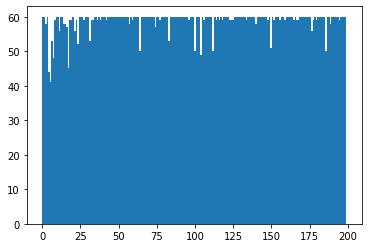

(11788, 64, 64, 3)


In [6]:
plt.hist(train_classes, bins=200)
plt.show()
assert(len(train_imgs) == len(train_classes))
print(train_imgs.shape)

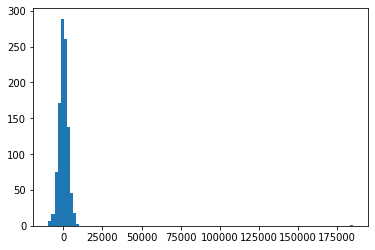

929
18.448483


In [7]:
plt.hist(np.sum(train_captions, axis=0), bins=100)
plt.show()
print(np.argmax(np.sum(train_captions, axis=0)))
print(train_captions[2786][929])

In [8]:
def create_simple_attrs(attrs):
    # Structure is like so: [0-14:color, 15-19:size, 20-33:shape]

    simple_attrs = np.zeros((attrs.shape[0], 34))
    
    # Color
    simple_attrs[:, 0:15] = attrs[:, 248:263]
    
    # Size and shape
    simple_attrs[:, 15:34] = attrs[:, 217:236]
    
    return simple_attrs


In [9]:
def create_even_simpler_attrs(attrs):
    # Structure is like so: [0-4:color, 5-7:size, 8-9:shape]
    
    simplest_attrs = np.zeros((attrs.shape[0], 10))
    
    simplest_attrs[:, 0] = attrs[:, 1] # Brown
    simplest_attrs[:, 1] = attrs[:, 5] # Grey
    simplest_attrs[:, 2] = attrs[:, 11] # Black
    simplest_attrs[:, 3] = attrs[:, 12] # White
    simplest_attrs[:, 4] = np.clip(np.sum(attrs[:, [0, 2, 3, 4, 6, 7, 8, 9, 10, 13, 14]], axis=1), a_min=0, a_max=1) # Other
    
    simplest_attrs[:, 5] = attrs[:, 19] # Smallest
    simplest_attrs[:, 6] = attrs[:, 16] # Small
    simplest_attrs[:, 7] = np.clip(np.sum(attrs[:, [15, 17, 18]], axis=1), a_min=0, a_max=1) # Large
    
    simplest_attrs[:, 8] = attrs[:, 33] # Perching-like
    simplest_attrs[:, 9] = np.clip(np.sum(attrs[:, [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]], axis=1), a_min=0, a_max=1) # Not perching-like
    
    return simplest_attrs

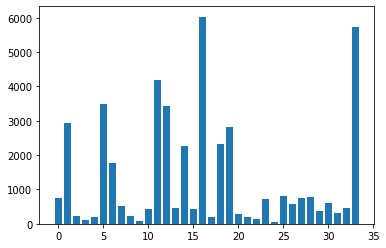

In [10]:
def load_image_attributes():
    train_attrs = np.zeros((train_imgs.shape[0], 312))
    with open('./CUB_200_2011/CUB_200_2011/attributes/image_attribute_labels.txt', 'r') as f:
        lines = f.readlines()
        for line in lines:
            
            # For now we don't care about attribute certainty, just if it is present.
            try:
                split = line.split()
                img_id = int(split[0])
                assert(img_id > 0)
                assert(img_id <= 11788)
                attr_id = int(split[1])
                assert(attr_id > 0)
                assert(attr_id <= 312)
                is_present = int(split[2])
                assert(is_present == 0 or is_present == 1)
            except: 
                print(line)
                print(line.split())
                return
            
            train_attrs[img_id-1, attr_id-1] = is_present
    return train_attrs

train_attrs = load_image_attributes().astype('float32')
train_attrs = create_simple_attrs(train_attrs)
plt.bar([x for x in range(34)], np.sum(train_attrs, axis=0))
plt.show()
train_attrs = create_even_simpler_attrs(train_attrs)
train_attrs = train_attrs.astype(np.float32)

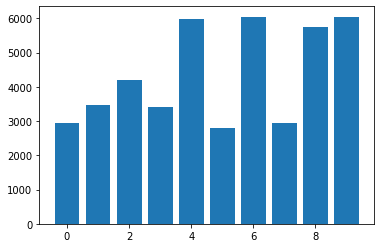

4358.4
1349.5349


In [11]:
plt.bar([x for x in range(10)], np.sum(train_attrs, axis=0))
plt.show()
sum_attrs = np.sum(train_attrs, axis=0)

print(np.mean(sum_attrs))
print(np.std(sum_attrs))
# np.argmin(sum_attrs)

In [12]:
def make_generator_model(shape):
    
    noise_in = Input(shape=shape)
    captions_in = Input(shape=(1024,))
    
    c = Dense(128)(captions_in)
    c = LeakyReLU()(c)
    
    c = Dense(10, activation='sigmoid')(c)
    
    # Possibly add a loss here between c and attrs
    
    input_layer = concatenate([noise_in, c])
    
    x = Dense(16*16*64*2)(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Reshape((16, 16, 128))(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh')(x)
    
    return Model([noise_in, captions_in], [x, c])

In [13]:
generator = make_generator_model((300,))
generator.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          131200      input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 128)          0           dense[0][0]                      
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 300)]        0                                            
______________________________________________________________________________________________

(1024,)


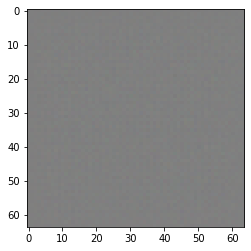

In [14]:
generator = make_generator_model((300,))

noise = np.random.normal(0, 1, 300)
label = train_captions[0]
print(label.shape)

generated_image = generator.predict( [np.array([noise]), np.array([label])] )[0][0]
plt.imshow(unnormalize_img(generated_image), )

In [15]:
def make_valid_discriminator_model():
    input_layer = Input((64, 64, 3))
#     x = GaussianNoise(1)(input_layer)
    
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same', name='valid')(input_layer)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)

    
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    
    x = Flatten()(x)
    x = Dense(64)(x) 
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    valid = Dense(1, activation='sigmoid')(x)
    
    return Model(input_layer, valid)

In [16]:
discriminator_valid = make_valid_discriminator_model()
discriminator_valid.summary()
valid = discriminator_valid.predict(np.array([generated_image]))


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
valid (Conv2D)               (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0   

In [17]:
def make_attr_discriminator_model():
    input_layer = Input((64, 64, 3))
    
#     x = GaussianNoise(1)(input_layer)
    
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same', name='attr')(input_layer)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)

    
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)


#     x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
#     x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
#     x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
#     x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
#     x = Dense(128)(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    x = Dense(48)(x)
#     x = Dense(64)(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    attr = Dense(10, activation='sigmoid')(x)
    
    return Model(input_layer, attr)

In [18]:
discriminator_attr = make_attr_discriminator_model()
discriminator_attr.summary()
attrs = discriminator_attr.predict(np.array([generated_image]))

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
attr (Conv2D)                (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 16, 16, 128)       0   

In [19]:
cross_entropy = BinaryCrossentropy(from_logits=False)

@tf.function
def discriminator_valid_loss(real_output, fake_output, flip):
    
    if flip:
        fake_labels = tf.random.uniform(fake_output.shape, minval=0.9, maxval=1.0)
        real_labels = tf.random.uniform(real_output.shape, minval=0.0, maxval=0.1)
    else:
        real_labels = tf.random.uniform(real_output.shape, minval=0.9, maxval=1.0)
        fake_labels = tf.random.uniform(fake_output.shape, minval=0.0, maxval=0.1)

        
    real_loss = cross_entropy(real_labels, real_output)
    fake_loss = cross_entropy(fake_labels, fake_output)
    total_loss = real_loss + fake_loss
    return total_loss, real_loss, fake_loss

In [20]:
# mse = MeanSquaredError()

@tf.function
def discriminator_attribute_loss_real(real_output, real_attributes):
    return cross_entropy(real_output, real_attributes)

@tf.function
def discriminator_attribute_loss_fake(fake_output, fake_attributes):
    return cross_entropy(fake_output, fake_attributes)

In [21]:
@tf.function
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

@tf.function
def generator_attr_loss(fake_attr_output, sampled_attrs):
    return cross_entropy(fake_attr_output, sampled_attrs)

@tf.function
def generator_caption_loss(fake_caption_output, sampled_captions):
    return cross_entropy(fake_caption_output, sampled_captions)

In [22]:
@tf.function
def train_step(images, attrs, captions, sampled_attrs, sampled_captions, flip, warmup):
    noise = tf.random.truncated_normal([32, 300], dtype=tf.dtypes.float64)
    
#     sampled_attrs = tf.cast(tf.random.uniform([32, 312], minval=0, maxval=2, dtype='int32'), 'float32') # Need to make this smarter. Only one 1 per attr.
#     attrs = tf.reshape(attrs, (attrs.shape[0], 1))
    
    gen_losses = []
    gen_valid_losses = []
    gen_attr_losses = []
    gen_caption_losses = []
    disc_losses = []
    disc_real_losses = []
    disc_fake_losses = []
    disc_attr_real_losses = []
    disc_attr_fake_losses = []

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape_valid, tf.GradientTape() as disc_tape_attr:
        gen_tape.watch(generator.trainable_variables)
        disc_tape_valid.watch(discriminator_valid.trainable_variables)
        disc_tape_attr.watch(discriminator_attr.trainable_variables)
        
        generated_images, generated_attrs = generator([noise, sampled_captions], training=True)
        
        real_output = discriminator_valid(images, training=True)
        fake_output = discriminator_valid(generated_images, training=True)
        
        real_attr_output = discriminator_attr(images, training=True)
        fake_attr_output = discriminator_attr(generated_images, training=True)
        
        gen_valid_loss = generator_loss(fake_output)
        gen_attr_loss = generator_attr_loss(fake_attr_output, sampled_attrs)
        gen_caption_loss = generator_caption_loss(generated_attrs, sampled_attrs)
        gen_loss = ((2.0 - warmup) * gen_valid_loss + (warmup * (gen_attr_loss + gen_caption_loss)))
        
        disc_valid_loss, disc_real_loss, disc_fake_loss = discriminator_valid_loss(real_output, fake_output, flip)
        disc_attr_real_loss = discriminator_attribute_loss_real(real_attr_output, attrs)
        disc_attr_fake_loss = discriminator_attribute_loss_fake(fake_attr_output, sampled_attrs)
        disc_attr_loss = ((2.0 - warmup) * disc_attr_real_loss + warmup * disc_attr_fake_loss)
#         disc_loss += ((2.0 - warmup) * disc_attr_real_loss + warmup * disc_attr_fake_loss)
        
        
        gen_losses.append(K.mean(gen_loss))
        gen_valid_losses.append(K.mean(gen_valid_loss))
        gen_attr_losses.append(K.mean(gen_attr_loss))
        gen_caption_losses.append(K.mean(gen_caption_loss))
        disc_losses.append(K.mean(disc_valid_loss))
        disc_real_losses.append(K.mean(disc_real_loss))
        disc_fake_losses.append(K.mean(disc_fake_loss))
        disc_attr_real_losses.append(K.mean(disc_attr_real_loss))
        disc_attr_fake_losses.append(K.mean(disc_attr_fake_loss))
    
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)

    gradients_of_discriminator_valid = disc_tape_valid.gradient(disc_valid_loss, discriminator_valid.trainable_variables)
    
    gradients_of_discriminator_attr = disc_tape_attr.gradient(disc_attr_loss, discriminator_attr.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    
    discriminator_valid_optimizer.apply_gradients(zip(gradients_of_discriminator_valid, discriminator_valid.trainable_variables))
    
    discriminator_attr_optimizer.apply_gradients(zip(gradients_of_discriminator_attr, discriminator_attr.trainable_variables))

    return (gen_losses, gen_valid_losses, gen_attr_losses, gen_caption_losses, disc_losses, disc_real_losses, disc_fake_losses, disc_attr_real_losses, disc_attr_fake_losses)

In [23]:
def train(train_imgs, train_attrs, train_captions, epochs, warmup):
    gen_loss_all = []
    gen_valid_loss_all = []
    gen_attr_loss_all = []
    gen_caption_loss_all = []
    disc_loss_all = []
    disc_loss_real_all = []
    disc_loss_fake_all = []
    disc_attr_loss_real_all = []
    disc_attr_loss_fake_all = []
    warmup_step = 1./2000.
    
    num_samples = len(train_imgs)
    batch_counter = 0
    
    for epoch in range(epochs):
        start = time.time()
        
        gen_loss_epoch = [1, 0]
        gen_valid_loss_epoch = [1, 0]
        gen_attr_loss_epoch = [1, 0]
        gen_caption_loss_epoch = [1, 0]
        disc_loss_epoch = [1, 0]
        disc_loss_real_epoch = [1, 0]
        disc_loss_fake_epoch = [1, 0]
        disc_attr_loss_real_epoch = [1, 0]
        disc_attr_loss_fake_epoch = [1, 0]
        
        seed = np.random.randint(0, 10000)
        np.random.seed(seed)
        np.random.shuffle(train_imgs)
        np.random.seed(seed)
        np.random.shuffle(train_attrs)
        np.random.seed(seed)
        np.random.shuffle(train_captions)
        
        all_indices = np.arange(len(train_attrs))
        np.random.shuffle(all_indices)
        
        for idx, i in enumerate(range(0, num_samples - 32, 32)):
            
            sampled_indices = all_indices[i:(i+32)]
            
            gen_loss_batch, gen_valid_loss_batch, gen_attr_loss_batch, gen_caption_loss_batch, disc_loss_batch, disc_loss_real_batch, disc_loss_fake_batch, disc_attr_loss_real_batch, disc_attr_loss_fake_batch = train_step(train_imgs[i:(i+32)], train_attrs[i:(i+32)], train_captions[i:(i+32)], train_attrs[sampled_indices], train_captions[sampled_indices], batch_counter % 20 == 0, tf.constant(warmup, dtype='float32'))

            gen_loss_epoch[0] += 1
            gen_valid_loss_epoch[0] += 1
            gen_attr_loss_epoch[0] += 1
            gen_caption_loss_epoch[0] += 1
            disc_loss_epoch[0] += 1
            disc_loss_real_epoch[0] += 1
            disc_loss_fake_epoch[0] += 1
            disc_attr_loss_real_epoch[0] += 1
            disc_attr_loss_fake_epoch[0] += 1
            gen_loss_epoch[1] += np.mean(gen_loss_batch)
            gen_valid_loss_epoch[1] += np.mean(gen_valid_loss_batch)
            gen_attr_loss_epoch[1] += np.mean(gen_attr_loss_batch)
            gen_caption_loss_epoch[1] += np.mean(gen_caption_loss_batch)
            disc_loss_epoch[1] += np.mean(disc_loss_batch)
            disc_loss_real_epoch[1] += np.mean(disc_loss_real_batch)
            disc_loss_fake_epoch[1] += np.mean(disc_loss_fake_batch)
            disc_attr_loss_real_epoch[1] += np.mean(disc_attr_loss_real_batch)
            disc_attr_loss_fake_epoch[1] += np.mean(disc_attr_loss_fake_batch)
            
            batch_counter += 1
            
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
        print(f'Gen loss: {gen_loss_epoch[1]/gen_loss_epoch[0]}, Gen valid loss: {gen_valid_loss_epoch[1]/gen_valid_loss_epoch[0]}, Gen attr loss: {gen_attr_loss_epoch[1]/gen_attr_loss_epoch[0]}, Gen caption loss: {gen_caption_loss_epoch[1]/gen_caption_loss_epoch[0]}, Disc valid loss: {disc_loss_epoch[1]/disc_loss_epoch[0]}, Disc valid real loss: {disc_loss_real_epoch[1]/disc_loss_real_epoch[0]}, Disc valid fake loss: {disc_loss_fake_epoch[1]/disc_loss_fake_epoch[0]}, Disc attr loss: {(disc_attr_loss_real_epoch[1] + disc_attr_loss_fake_epoch[1])/(disc_attr_loss_real_epoch[0])}, Disc attr real loss: {disc_attr_loss_real_epoch[1]/disc_attr_loss_real_epoch[0]}, Disc attr fake loss: {disc_attr_loss_fake_epoch[1]/disc_attr_loss_fake_epoch[0]}')
        
        gen_loss_all.append(gen_loss_epoch[1]/gen_loss_epoch[0])
        gen_valid_loss_all.append(gen_valid_loss_epoch[1]/gen_valid_loss_epoch[0])
        gen_attr_loss_all.append(gen_attr_loss_epoch[1]/gen_attr_loss_epoch[0])
        gen_caption_loss_all.append(gen_caption_loss_epoch[1]/gen_caption_loss_epoch[0])
        disc_loss_all.append(disc_loss_epoch[1]/disc_loss_epoch[0])
        disc_loss_real_all.append(disc_loss_real_epoch[1]/disc_loss_real_epoch[0])
        disc_loss_fake_all.append(disc_loss_fake_epoch[1]/disc_loss_fake_epoch[0])
        disc_attr_loss_real_all.append(disc_attr_loss_real_epoch[1]/disc_attr_loss_real_epoch[0])
        disc_attr_loss_fake_all.append(disc_attr_loss_fake_epoch[1]/disc_attr_loss_fake_epoch[0])
        
        if warmup < 1:
            warmup += warmup_step
    
    return (gen_loss_all, gen_valid_loss_all, gen_attr_loss_all, gen_caption_loss_all, disc_loss_all, disc_loss_real_all, disc_loss_fake_all, disc_attr_loss_real_all, disc_attr_loss_fake_all, warmup)
    


In [24]:
def long_train(starting_checkpoint=0, num_checkpoints=0, checkpoint_interval=0, g_hist=None, g_valid_hist=None, g_attr_hist=None, g_caption_hist=None, d_hist=None, d_real_hist=None, d_fake_hist=None, d_attr_real_hist=None, d_attr_fake_hist=None, noise=None, caption=None, save_files=False, warmup=0.):

    for i in range(starting_checkpoint, starting_checkpoint + num_checkpoints):
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print('')
        print(f'Starting checkpoint {i}')
        print('')
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        
        gen_temp, gen_valid_temp, gen_attr_temp, gen_caption_temp, disc_temp, disc_real_temp, disc_fake_temp, disc_attr_real_temp, disc_attr_fake_temp, warmup = train(train_imgs, train_attrs, train_captions, checkpoint_interval, warmup)
        
        g_hist += gen_temp
        g_valid_hist += gen_valid_temp
        g_attr_hist += gen_attr_temp
        g_caption_hist += gen_caption_temp
        d_hist += disc_temp
        d_real_hist += disc_real_temp
        d_fake_hist += disc_fake_temp
        d_attr_real_hist += disc_attr_real_temp
        d_attr_fake_hist += disc_attr_fake_temp
        generated_image = generator.predict( [np.array([noise]), np.array([caption])])[0][0]
        plt.imshow(unnormalize_img(generated_image))
        if save_files:
            plt.savefig('./results/prog-imgs/bird-gan-attributes-split-captions-concat-caption-loss/' + str((i+1)*checkpoint_interval) + '.png')
        plt.show()
        if save_files:
            generator.save_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss/gen_weights_attributes_split_' + str((i+1)*checkpoint_interval) + '.h5')
            discriminator_valid.save_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss/disc_weights_attributes_split_valid_' + str((i+1)*checkpoint_interval) + '.h5')
            discriminator_attr.save_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss/disc_weights_attributes_split_attr_' + str((i+1)*checkpoint_interval) + '.h5')
    
    return starting_checkpoint + num_checkpoints, totalepochs, warmup

In [25]:
discriminator_valid = make_valid_discriminator_model()
discriminator_attr = make_attr_discriminator_model()
generator = make_generator_model((300,))
generator_optimizer = Adam(1e-4, beta_1=0.5)
discriminator_valid_optimizer = Adam(1e-4, beta_1=0.5)
discriminator_attr_optimizer = Adam(1e-5, beta_1=0.5)

In [26]:
# To get passed into training function and get modified
# Run cell when starting from scratch
gen_loss_hist = []
gen_valid_loss_hist = []
gen_attr_loss_hist = []
gen_caption_loss_hist = []
disc_loss_hist = []
disc_loss_real_hist = []
disc_loss_fake_hist = []
disc_attr_loss_real_hist = []
disc_attr_loss_fake_hist = []
noise300 = np.random.normal(0, 1, 300)
caption = train_captions[5000]
next_starting_checkpoint = 0
totalepochs = 0
warmup = 1.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 40

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 35.3207368850708 sec
Gen loss: 8.614340879083649, Gen valid loss: 1.3368110937800834, Gen attr loss: 3.600791068581062, Gen caption loss: 3.67673874547488, Disc valid loss: 1.070416974827526, Disc valid real loss: 0.5466357056041397, Disc valid fake loss: 0.5237812668004334, Disc attr loss: 6.8326662807929806, Disc attr real loss: 3.231875212211919, Disc attr fake loss: 3.600791068581062
Time for epoch 2 is 35.62697720527649 sec
Gen loss: 8.583198813565055, Gen valid loss: 1.342675619332125, Gen attr loss: 3.5727151674306814, Gen caption loss: 3.6678080352018196, Disc valid loss: 1.063247118215897, Disc valid real loss: 0.5432533216347216, Disc valid fake loss: 0.5199937954504639, Disc attr loss: 6.803844981077241, Disc attr real loss: 3.2311298136465596, Disc attr fake loss: 3.5727151674306814
Time for epoch 3 is 35.88925099372864 sec
Gen loss: 8.581

Time for epoch 21 is 37.380839586257935 sec
Gen loss: 8.549886576851533, Gen valid loss: 1.3193661778922972, Gen attr loss: 3.5668952393984084, Gen caption loss: 3.663625175067726, Disc valid loss: 1.075439178846716, Disc valid real loss: 0.552442886480471, Disc valid fake loss: 0.5229962930931309, Disc attr loss: 6.796458881398849, Disc attr real loss: 3.2295636420004414, Disc attr fake loss: 3.5668952393984084
Time for epoch 22 is 37.4393994808197 sec
Gen loss: 8.597223183649989, Gen valid loss: 1.3276548598839986, Gen attr loss: 3.591055506290136, Gen caption loss: 3.6785128097224042, Disc valid loss: 1.0646647799628859, Disc valid real loss: 0.5461871865480573, Disc valid fake loss: 0.518477593657124, Disc attr loss: 6.819270720649864, Disc attr real loss: 3.228215214359728, Disc attr fake loss: 3.591055506290136
Time for epoch 23 is 37.402727127075195 sec
Gen loss: 8.559793587299543, Gen valid loss: 1.3259419729393027, Gen attr loss: 3.56892953590972, Gen caption loss: 3.664922060

Time for epoch 41 is 37.48363733291626 sec
Gen loss: 8.600490261222612, Gen valid loss: 1.3398303929060131, Gen attr loss: 3.5895275223222853, Gen caption loss: 3.671132336464032, Disc valid loss: 1.069346846765296, Disc valid real loss: 0.5480030141064145, Disc valid fake loss: 0.5213438340318881, Disc attr loss: 6.815118432368044, Disc attr real loss: 3.2255909100457583, Disc attr fake loss: 3.5895275223222853
Time for epoch 42 is 37.491008043289185 sec
Gen loss: 8.569029809336675, Gen valid loss: 1.331537087758382, Gen attr loss: 3.5717244316245806, Gen caption loss: 3.6657682608782762, Disc valid loss: 1.062657651216357, Disc valid real loss: 0.5429794181007034, Disc valid fake loss: 0.5196782308542308, Disc attr loss: 6.795834634362198, Disc attr real loss: 3.224110202737617, Disc attr fake loss: 3.5717244316245806
Time for epoch 43 is 37.44272232055664 sec
Gen loss: 8.530511242264332, Gen valid loss: 1.337597452205048, Gen attr loss: 3.545936097297565, Gen caption loss: 3.6469776

Time for epoch 61 is 37.44818711280823 sec
Gen loss: 8.549996909733387, Gen valid loss: 1.337338917946751, Gen attr loss: 3.562668188477596, Gen caption loss: 3.6499898013706775, Disc valid loss: 1.067753610895255, Disc valid real loss: 0.5516996260904038, Disc valid fake loss: 0.5160539856125023, Disc attr loss: 6.784379658660268, Disc attr real loss: 3.221711470182672, Disc attr fake loss: 3.562668188477596
Time for epoch 62 is 37.54762411117554 sec
Gen loss: 8.522736241823935, Gen valid loss: 1.335738573294022, Gen attr loss: 3.54739257507531, Gen caption loss: 3.639605084085852, Disc valid loss: 1.0651439846692692, Disc valid real loss: 0.5423008293963383, Disc valid fake loss: 0.5228431572112934, Disc attr loss: 6.767408934712087, Disc attr real loss: 3.220016359636777, Disc attr fake loss: 3.54739257507531
Time for epoch 63 is 37.47350025177002 sec
Gen loss: 8.518925458758181, Gen valid loss: 1.3249477353199388, Gen attr loss: 3.5511034071283936, Gen caption loss: 3.6428743403778

Time for epoch 81 is 37.54360485076904 sec
Gen loss: 8.60455886716765, Gen valid loss: 1.3511148912473745, Gen attr loss: 3.582800734656936, Gen caption loss: 3.670643234640602, Disc valid loss: 1.0632832441226576, Disc valid real loss: 0.5438695018530538, Disc valid fake loss: 0.5194137433195501, Disc attr loss: 6.799407902448804, Disc attr real loss: 3.216607167791868, Disc attr fake loss: 3.582800734656936
Time for epoch 82 is 37.528478145599365 sec
Gen loss: 8.554014357124887, Gen valid loss: 1.3244726270194944, Gen attr loss: 3.5701718246387597, Gen caption loss: 3.6593699196812906, Disc valid loss: 1.0709199937701548, Disc valid real loss: 0.5500080740548731, Disc valid fake loss: 0.5209119179384495, Disc attr loss: 6.786937438375581, Disc attr real loss: 3.216765613736822, Disc attr fake loss: 3.5701718246387597
Time for epoch 83 is 37.59636998176575 sec
Gen loss: 8.578961466709126, Gen valid loss: 1.3332913831320559, Gen attr loss: 3.5823159663657833, Gen caption loss: 3.663354

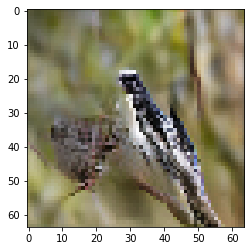

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 41

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.49602246284485 sec
Gen loss: 8.584195956305114, Gen valid loss: 1.3339037370229478, Gen attr loss: 3.580965296685857, Gen caption loss: 3.669326926957624, Disc valid loss: 1.0684032343267424, Disc valid real loss: 0.5494068062240839, Disc valid fake loss: 0.518996428344954, Disc attr loss: 6.793589778062774, Disc attr real loss: 3.212624481376917, Disc attr fake loss: 3.580965296685857
Time for epoch 2 is 37.42114305496216 sec
Gen loss: 8.518370444858624, Gen valid loss: 1.318274820884715, Gen attr loss: 3.551714835128164, Gen caption loss: 3.6483807822230063, Disc valid loss: 1.072137655281439, Disc valid real loss: 0.5500219431996023, Disc valid fake loss: 0.5221157103050046, Disc attr loss: 6.766279905469114, Disc attr real loss: 3.21456507034095, Disc attr fake loss: 3.551714835128164
Time for epoch 3 is 37.45392990112305 sec
Gen loss: 8.565252

Time for epoch 21 is 37.5130033493042 sec
Gen loss: 8.651447356877934, Gen valid loss: 1.3337035763877516, Gen attr loss: 3.624874817969676, Gen caption loss: 3.6928689725353787, Disc valid loss: 1.0704895131956271, Disc valid real loss: 0.5485205089012135, Disc valid fake loss: 0.5219690044559437, Disc attr loss: 6.834993271323723, Disc attr real loss: 3.210118453354047, Disc attr fake loss: 3.624874817969676
Time for epoch 22 is 37.63658022880554 sec
Gen loss: 8.52715404505329, Gen valid loss: 1.3338328383479339, Gen attr loss: 3.5505153971312815, Gen caption loss: 3.642805815389163, Disc valid loss: 1.0683825778444285, Disc valid real loss: 0.5407802907593529, Disc valid fake loss: 0.5276022897503241, Disc attr loss: 6.760182916956542, Disc attr real loss: 3.2096675198252607, Disc attr fake loss: 3.5505153971312815
Time for epoch 23 is 37.564528942108154 sec
Gen loss: 8.5319138219363, Gen valid loss: 1.3361336871537413, Gen attr loss: 3.5545866786625973, Gen caption loss: 3.64119344

Time for epoch 41 is 37.63556790351868 sec
Gen loss: 8.609589933379878, Gen valid loss: 1.3409435238618514, Gen attr loss: 3.5901890679749693, Gen caption loss: 3.6784573473581452, Disc valid loss: 1.0694908677400936, Disc valid real loss: 0.5485438851483146, Disc valid fake loss: 0.5209469822687185, Disc attr loss: 6.797669543806453, Disc attr real loss: 3.207480475831484, Disc attr fake loss: 3.5901890679749693
Time for epoch 42 is 37.64652132987976 sec
Gen loss: 8.49659287961841, Gen valid loss: 1.3275269573620019, Gen attr loss: 3.5377142565037176, Gen caption loss: 3.6313516835210122, Disc valid loss: 1.062454817902428, Disc valid real loss: 0.5460608436001672, Disc valid fake loss: 0.5163939743830259, Disc attr loss: 6.7445572327146035, Disc attr real loss: 3.2068429762108863, Disc attr fake loss: 3.5377142565037176
Time for epoch 43 is 37.537899017333984 sec
Gen loss: 8.540708227855403, Gen valid loss: 1.3398182369506133, Gen attr loss: 3.5544764375298974, Gen caption loss: 3.64

Time for epoch 61 is 37.35194134712219 sec
Gen loss: 8.53416226162174, Gen valid loss: 1.3467931337149808, Gen attr loss: 3.550447480788399, Gen caption loss: 3.6369216274116742, Disc valid loss: 1.061286808837074, Disc valid real loss: 0.5405778070775474, Disc valid fake loss: 0.5207090032132984, Disc attr loss: 6.7547008732793135, Disc attr real loss: 3.204253392490914, Disc attr fake loss: 3.550447480788399
Time for epoch 62 is 37.75139570236206 sec
Gen loss: 8.505296960432679, Gen valid loss: 1.3254165176130568, Gen attr loss: 3.5439885173063614, Gen caption loss: 3.6358918768926687, Disc valid loss: 1.0697268336445982, Disc valid real loss: 0.547001845791411, Disc valid fake loss: 0.5227249882570127, Disc attr loss: 6.746413022198975, Disc attr real loss: 3.2024245048926128, Disc attr fake loss: 3.5439885173063614
Time for epoch 63 is 37.495646238327026 sec
Gen loss: 8.541646388811147, Gen valid loss: 1.3360653249874994, Gen attr loss: 3.556983449594761, Gen caption loss: 3.648597

Time for epoch 81 is 37.37012314796448 sec
Gen loss: 8.535289122160211, Gen valid loss: 1.3426688609084463, Gen attr loss: 3.5479141793599944, Gen caption loss: 3.6447060754305625, Disc valid loss: 1.0676439091119017, Disc valid real loss: 0.5472583769136651, Disc valid fake loss: 0.5203855325212969, Disc attr loss: 6.746515253371985, Disc attr real loss: 3.1986010740119912, Disc attr fake loss: 3.5479141793599944
Time for epoch 82 is 37.43780565261841 sec
Gen loss: 8.545373335117247, Gen valid loss: 1.3383203034155413, Gen attr loss: 3.5545195331418418, Gen caption loss: 3.6525334950061996, Disc valid loss: 1.0623300217677585, Disc valid real loss: 0.540958092383899, Disc valid fake loss: 0.521371931483752, Disc attr loss: 6.752372037427535, Disc attr real loss: 3.1978525042856933, Disc attr fake loss: 3.5545195331418418
Time for epoch 83 is 37.44931650161743 sec
Gen loss: 8.604910116531661, Gen valid loss: 1.3675028077632108, Gen attr loss: 3.577442448959764, Gen caption loss: 3.6599

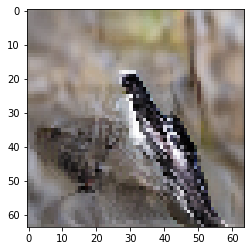

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 42

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.44484996795654 sec
Gen loss: 8.47878549544792, Gen valid loss: 1.3342620702939951, Gen attr loss: 3.5241501460553506, Gen caption loss: 3.620373271022063, Disc valid loss: 1.0697365781156027, Disc valid real loss: 0.5476342477611087, Disc valid fake loss: 0.5221023309198498, Disc attr loss: 6.716805147284738, Disc attr real loss: 3.192655001229387, Disc attr fake loss: 3.5241501460553506
Time for epoch 2 is 37.38084530830383 sec
Gen loss: 8.849989203579703, Gen valid loss: 1.338953735059516, Gen attr loss: 3.7226567636660444, Gen caption loss: 3.78837871034617, Disc valid loss: 1.062453921894394, Disc valid real loss: 0.5455984248701473, Disc valid fake loss: 0.5168554966204212, Disc attr loss: 6.916417029491931, Disc attr real loss: 3.193760265825887, Disc attr fake loss: 3.7226567636660444
Time for epoch 3 is 37.41320991516113 sec
Gen loss: 8.575

Time for epoch 21 is 37.50569987297058 sec
Gen loss: 8.5267908708836, Gen valid loss: 1.332059484671771, Gen attr loss: 3.551486145190107, Gen caption loss: 3.643245268643387, Disc valid loss: 1.0692078703787269, Disc valid real loss: 0.5492437909935225, Disc valid fake loss: 0.5199640797082647, Disc attr loss: 6.743072089464038, Disc attr real loss: 3.1915859442739305, Disc attr fake loss: 3.551486145190107
Time for epoch 22 is 37.52197480201721 sec
Gen loss: 8.522966433992877, Gen valid loss: 1.345987030645696, Gen attr loss: 3.5403277454014392, Gen caption loss: 3.636651671675809, Disc valid loss: 1.0529953637097262, Disc valid real loss: 0.5398161488012246, Disc valid fake loss: 0.5131792152315621, Disc attr loss: 6.730430965501118, Disc attr real loss: 3.190103220099679, Disc attr fake loss: 3.5403277454014392
Time for epoch 23 is 37.421170234680176 sec
Gen loss: 8.505911106016578, Gen valid loss: 1.3322541720175807, Gen attr loss: 3.5418774151220553, Gen caption loss: 3.631779517

Time for epoch 41 is 37.35174536705017 sec
Gen loss: 8.51953765047275, Gen valid loss: 1.347493956405619, Gen attr loss: 3.5388847043520713, Gen caption loss: 3.633159009421744, Disc valid loss: 1.0661175716214064, Disc valid real loss: 0.5468956425907167, Disc valid fake loss: 0.5192219266885019, Disc attr loss: 6.726599702667092, Disc attr real loss: 3.18771499831502, Disc attr fake loss: 3.5388847043520713
Time for epoch 42 is 37.661038875579834 sec
Gen loss: 8.508243732659151, Gen valid loss: 1.3396823984497608, Gen attr loss: 3.537678345109066, Gen caption loss: 3.630882972624244, Disc valid loss: 1.0556720159241177, Disc valid real loss: 0.5386210611357598, Disc valid fake loss: 0.5170509551921834, Disc attr loss: 6.725101056137706, Disc attr real loss: 3.1874227110286393, Disc attr fake loss: 3.537678345109066
Time for epoch 43 is 37.53451442718506 sec
Gen loss: 8.529755491551345, Gen valid loss: 1.3508628338656128, Gen attr loss: 3.544571782838361, Gen caption loss: 3.634320892

Time for epoch 61 is 37.489389181137085 sec
Gen loss: 8.530626927610982, Gen valid loss: 1.3221128127439234, Gen attr loss: 3.5557470005056078, Gen caption loss: 3.6527671251839737, Disc valid loss: 1.0749661676928925, Disc valid real loss: 0.550713820428383, Disc valid fake loss: 0.5242523485567512, Disc attr loss: 6.7396185094425025, Disc attr real loss: 3.1838715089368947, Disc attr fake loss: 3.5557470005056078
Time for epoch 62 is 37.58997201919556 sec
Gen loss: 8.486303217042753, Gen valid loss: 1.3274040511307033, Gen attr loss: 3.530056492746038, Gen caption loss: 3.6288426717122397, Disc valid loss: 1.0649876350632852, Disc valid real loss: 0.5440929489245583, Disc valid fake loss: 0.5208946893693309, Disc attr loss: 6.714352829346489, Disc attr real loss: 3.184296336600451, Disc attr fake loss: 3.530056492746038
Time for epoch 63 is 37.375017166137695 sec
Gen loss: 8.521165607421379, Gen valid loss: 1.3316453251089184, Gen attr loss: 3.5515644479250197, Gen caption loss: 3.63

Time for epoch 81 is 37.442118406295776 sec
Gen loss: 8.528813882894955, Gen valid loss: 1.331883797800638, Gen attr loss: 3.5506162830807653, Gen caption loss: 3.646313828181445, Disc valid loss: 1.070463367755497, Disc valid real loss: 0.5463417226544564, Disc valid fake loss: 0.5241216404974299, Disc attr loss: 6.732314530426894, Disc attr real loss: 3.1816982473461284, Disc attr fake loss: 3.5506162830807653
Time for epoch 82 is 37.435240030288696 sec
Gen loss: 8.530781398297648, Gen valid loss: 1.331229236067795, Gen attr loss: 3.554087390744589, Gen caption loss: 3.6454647575936665, Disc valid loss: 1.0633444199717141, Disc valid real loss: 0.5402984292849615, Disc valid fake loss: 0.5230459911713432, Disc attr loss: 6.736980590716933, Disc attr real loss: 3.182893199972344, Disc attr fake loss: 3.554087390744589
Time for epoch 83 is 37.39364242553711 sec
Gen loss: 8.49897200757572, Gen valid loss: 1.3208443457841228, Gen attr loss: 3.5442762937003036, Gen caption loss: 3.6338513

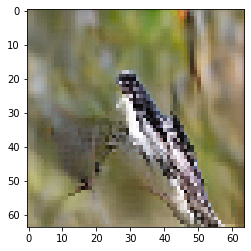

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 43

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.33925914764404 sec
Gen loss: 8.520561086453073, Gen valid loss: 1.3370155394884953, Gen attr loss: 3.54223989923472, Gen caption loss: 3.6413056585523815, Disc valid loss: 1.065802437987754, Disc valid real loss: 0.544946879713839, Disc valid fake loss: 0.5208555576277942, Disc attr loss: 6.721863152858042, Disc attr real loss: 3.1796232536233213, Disc attr fake loss: 3.54223989923472
Time for epoch 2 is 37.39730501174927 sec
Gen loss: 8.524387388048456, Gen valid loss: 1.342044477540303, Gen attr loss: 3.5440603795090344, Gen caption loss: 3.638282558136193, Disc valid loss: 1.0639893499816335, Disc valid real loss: 0.5431094092889853, Disc valid fake loss: 0.5208799409349436, Disc attr loss: 6.7230817024623795, Disc attr real loss: 3.1790213229533455, Disc attr fake loss: 3.5440603795090344
Time for epoch 3 is 37.53758454322815 sec
Gen loss: 8.46

Time for epoch 21 is 37.41041827201843 sec
Gen loss: 8.51358992362087, Gen valid loss: 1.33585314925124, Gen attr loss: 3.540451368988368, Gen caption loss: 3.6372854283185507, Disc valid loss: 1.0669978810196648, Disc valid real loss: 0.5454724937435088, Disc valid fake loss: 0.5215253863877397, Disc attr loss: 6.71863715241595, Disc attr real loss: 3.1781857834275824, Disc attr fake loss: 3.540451368988368
Time for epoch 22 is 37.33251643180847 sec
Gen loss: 8.546067555745443, Gen valid loss: 1.3245536499230197, Gen attr loss: 3.5682028735556255, Gen caption loss: 3.6533110594038716, Disc valid loss: 1.071410323707715, Disc valid real loss: 0.5476999161689262, Disc valid fake loss: 0.5237104085887351, Disc attr loss: 6.745732098737061, Disc attr real loss: 3.1775292251814347, Disc attr fake loss: 3.5682028735556255
Time for epoch 23 is 37.61496376991272 sec
Gen loss: 8.451773391506537, Gen valid loss: 1.3146368284535601, Gen attr loss: 3.5216883223877367, Gen caption loss: 3.61544821

Time for epoch 41 is 37.44259786605835 sec
Gen loss: 8.468290092499275, Gen valid loss: 1.327356691282939, Gen attr loss: 3.5279023453472105, Gen caption loss: 3.613031065560938, Disc valid loss: 1.0719268640205466, Disc valid real loss: 0.5511687206543558, Disc valid fake loss: 0.5207581439315465, Disc attr loss: 6.701858500155007, Disc attr real loss: 3.1739561548077964, Disc attr fake loss: 3.5279023453472105
Time for epoch 42 is 37.50501871109009 sec
Gen loss: 8.476004813744769, Gen valid loss: 1.3324757714258624, Gen attr loss: 3.52724441344822, Gen caption loss: 3.6162846243478417, Disc valid loss: 1.0631243993596333, Disc valid real loss: 0.5441602055780933, Disc valid fake loss: 0.5189641938623051, Disc attr loss: 6.7018802133679065, Disc attr real loss: 3.174635799919687, Disc attr fake loss: 3.52724441344822
Time for epoch 43 is 37.397032260894775 sec
Gen loss: 8.479312823070742, Gen valid loss: 1.3384674409540689, Gen attr loss: 3.5224958370694623, Gen caption loss: 3.618349

Time for epoch 61 is 37.464349031448364 sec
Gen loss: 8.431435838301331, Gen valid loss: 1.3195242095122814, Gen attr loss: 3.5100329200103677, Gen caption loss: 3.6018787212165067, Disc valid loss: 1.0762712661489884, Disc valid real loss: 0.5520847534261099, Disc valid fake loss: 0.524186515388127, Disc attr loss: 6.681381635872652, Disc attr real loss: 3.1713487158622846, Disc attr fake loss: 3.5100329200103677
Time for epoch 62 is 37.41885542869568 sec
Gen loss: 8.468357706457619, Gen valid loss: 1.3215663213393876, Gen attr loss: 3.5247165904781683, Gen caption loss: 3.622074804977996, Disc valid loss: 1.0695864112396551, Disc valid real loss: 0.5428250636350171, Disc valid fake loss: 0.5267613464739265, Disc attr loss: 6.696442806946876, Disc attr real loss: 3.1717262164687074, Disc attr fake loss: 3.5247165904781683
Time for epoch 63 is 37.458805084228516 sec
Gen loss: 8.655897932647044, Gen valid loss: 1.3269260213950138, Gen attr loss: 3.623384281225644, Gen caption loss: 3.70

Time for epoch 81 is 37.43150782585144 sec
Gen loss: 8.480445755852593, Gen valid loss: 1.318711734399563, Gen attr loss: 3.5368514558487147, Gen caption loss: 3.6248825707732824, Disc valid loss: 1.085793018664125, Disc valid real loss: 0.5601750078401592, Disc valid fake loss: 0.5256180112277912, Disc attr loss: 6.707676309234081, Disc attr real loss: 3.170824853385367, Disc attr fake loss: 3.5368514558487147
Time for epoch 82 is 37.42303252220154 sec
Gen loss: 8.485080012137974, Gen valid loss: 1.3287495967495409, Gen attr loss: 3.5315770195105536, Gen caption loss: 3.6247533924857454, Disc valid loss: 1.0581958605668087, Disc valid real loss: 0.5420051977078766, Disc valid fake loss: 0.5161906614051601, Disc attr loss: 6.702985953186262, Disc attr real loss: 3.171408933675709, Disc attr fake loss: 3.5315770195105536
Time for epoch 83 is 37.452571392059326 sec
Gen loss: 8.499350913494906, Gen valid loss: 1.3446565152506842, Gen attr loss: 3.5270799853937413, Gen caption loss: 3.6276

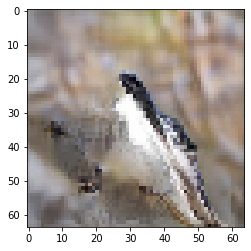

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 44

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.40204453468323 sec
Gen loss: 8.487332344055176, Gen valid loss: 1.3388159497966612, Gen attr loss: 3.53113548607038, Gen caption loss: 3.6173809014038665, Disc valid loss: 1.0697279501413588, Disc valid real loss: 0.5451256620690106, Disc valid fake loss: 0.5246022890415295, Disc attr loss: 6.699730046073273, Disc attr real loss: 3.168594560002893, Disc attr fake loss: 3.53113548607038
Time for epoch 2 is 37.45851016044617 sec
Gen loss: 8.507618816241338, Gen valid loss: 1.3369378504068226, Gen attr loss: 3.53690287414282, Gen caption loss: 3.6337780836151867, Disc valid loss: 1.0615059400638591, Disc valid real loss: 0.5420681370629205, Disc valid fake loss: 0.5194378043739454, Disc attr loss: 6.704585964763714, Disc attr real loss: 3.1676830906208937, Disc attr fake loss: 3.53690287414282
Time for epoch 3 is 37.50030589103699 sec
Gen loss: 8.5364

Time for epoch 21 is 37.48567485809326 sec
Gen loss: 8.49861679749114, Gen valid loss: 1.326739863974615, Gen attr loss: 3.5386227682677065, Gen caption loss: 3.6332541688024835, Disc valid loss: 1.0696061713908747, Disc valid real loss: 0.5469870113421907, Disc valid fake loss: 0.5226191597256235, Disc attr loss: 6.70285817342722, Disc attr real loss: 3.1642354051595136, Disc attr fake loss: 3.5386227682677065
Time for epoch 22 is 37.498382806777954 sec
Gen loss: 8.45646841416191, Gen valid loss: 1.3201379294640974, Gen attr loss: 3.5235900071255237, Gen caption loss: 3.6127404791875906, Disc valid loss: 1.0725923634480008, Disc valid real loss: 0.5483682758924437, Disc valid fake loss: 0.5242240881209128, Disc attr loss: 6.68684987227122, Disc attr real loss: 3.163259865145696, Disc attr fake loss: 3.5235900071255237
Time for epoch 23 is 37.43438220024109 sec
Gen loss: 8.495788420441997, Gen valid loss: 1.3471956642339546, Gen attr loss: 3.5281729659413905, Gen caption loss: 3.620419

Time for epoch 41 is 37.64299726486206 sec
Gen loss: 8.466166845182093, Gen valid loss: 1.3197920681015263, Gen attr loss: 3.5266487275358784, Gen caption loss: 3.619726045991024, Disc valid loss: 1.0780491748153356, Disc valid real loss: 0.5543636380010827, Disc valid fake loss: 0.523685536895018, Disc attr loss: 6.687457751452438, Disc attr real loss: 3.16080902391656, Disc attr fake loss: 3.5266487275358784
Time for epoch 42 is 37.30161380767822 sec
Gen loss: 8.494124019695168, Gen valid loss: 1.328361296233769, Gen attr loss: 3.538106004074014, Gen caption loss: 3.627656724717882, Disc valid loss: 1.0669067300109036, Disc valid real loss: 0.5448450479242537, Disc valid fake loss: 0.522061679744462, Disc attr loss: 6.697914674676207, Disc attr real loss: 3.1598086706021937, Disc attr fake loss: 3.538106004074014
Time for epoch 43 is 37.55349349975586 sec
Gen loss: 8.486095463357321, Gen valid loss: 1.3425786739119345, Gen attr loss: 3.527538694986483, Gen caption loss: 3.61597810657

Time for epoch 61 is 37.55224084854126 sec
Gen loss: 8.458457077098732, Gen valid loss: 1.3376807032561884, Gen attr loss: 3.5169803960536554, Gen caption loss: 3.6037959832809157, Disc valid loss: 1.0755999049520104, Disc valid real loss: 0.5490932668127665, Disc valid fake loss: 0.5265066358778212, Disc attr loss: 6.674791992195254, Disc attr real loss: 3.157811596141598, Disc attr fake loss: 3.5169803960536554
Time for epoch 62 is 37.51379442214966 sec
Gen loss: 8.480433400730453, Gen valid loss: 1.3239823935154653, Gen attr loss: 3.5326227030456874, Gen caption loss: 3.6238283032001197, Disc valid loss: 1.0650881359247657, Disc valid real loss: 0.5466151314214639, Disc valid fake loss: 0.5184730036148857, Disc attr loss: 6.690801248317811, Disc attr real loss: 3.1581785452721243, Disc attr fake loss: 3.5326227030456874
Time for epoch 63 is 37.434157609939575 sec
Gen loss: 8.470985438442488, Gen valid loss: 1.3327408163205072, Gen attr loss: 3.525284286436996, Gen caption loss: 3.61

Time for epoch 81 is 37.43780779838562 sec
Gen loss: 8.44934758002842, Gen valid loss: 1.314222327415859, Gen attr loss: 3.52350198673362, Gen caption loss: 3.611623275570753, Disc valid loss: 1.0791294219371104, Disc valid real loss: 0.5516108053971113, Disc valid fake loss: 0.5275186176707105, Disc attr loss: 6.677291470814526, Disc attr real loss: 3.1537894840809066, Disc attr fake loss: 3.52350198673362
Time for epoch 82 is 37.53285098075867 sec
Gen loss: 8.74156344550735, Gen valid loss: 1.3452871364306629, Gen attr loss: 3.6568942380145315, Gen caption loss: 3.739382064762477, Disc valid loss: 1.0554527493350228, Disc valid real loss: 0.5384986273803039, Disc valid fake loss: 0.5169541222777793, Disc attr loss: 6.813351837277089, Disc attr real loss: 3.156457599262558, Disc attr fake loss: 3.6568942380145315
Time for epoch 83 is 37.60719275474548 sec
Gen loss: 8.473511923296341, Gen valid loss: 1.3475358470022516, Gen attr loss: 3.518247724548588, Gen caption loss: 3.607728352068

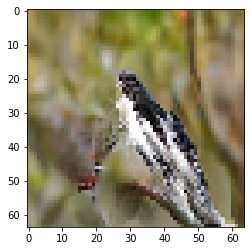

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 45

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.35639762878418 sec
Gen loss: 8.440376099532212, Gen valid loss: 1.322120082087633, Gen attr loss: 3.513473629628417, Gen caption loss: 3.6047824249681097, Disc valid loss: 1.0718811538807422, Disc valid real loss: 0.5504420189676569, Disc valid fake loss: 0.5214391352361457, Disc attr loss: 6.665187305874294, Disc attr real loss: 3.151713676245878, Disc attr fake loss: 3.513473629628417
Time for epoch 2 is 37.78769111633301 sec
Gen loss: 8.590772677889362, Gen valid loss: 1.3479568880747974, Gen attr loss: 3.577169044231012, Gen caption loss: 3.6656467617365727, Disc valid loss: 1.0596780941738346, Disc valid real loss: 0.5398231944256036, Disc valid fake loss: 0.5198549002328217, Disc attr loss: 6.730132095212859, Disc attr real loss: 3.1529630509818474, Disc attr fake loss: 3.577169044231012
Time for epoch 3 is 37.42932987213135 sec
Gen loss: 8.4

Time for epoch 21 is 37.47538352012634 sec
Gen loss: 8.459370078110114, Gen valid loss: 1.330872949061355, Gen attr loss: 3.516687281409576, Gen caption loss: 3.6118098616923096, Disc valid loss: 1.069828540005981, Disc valid real loss: 0.5461974009104215, Disc valid fake loss: 0.5236311414377476, Disc attr loss: 6.667888910143679, Disc attr real loss: 3.151201628734103, Disc attr fake loss: 3.516687281409576
Time for epoch 22 is 37.518532514572144 sec
Gen loss: 8.432569026947021, Gen valid loss: 1.335801441979602, Gen attr loss: 3.500110458875413, Gen caption loss: 3.596657121730691, Disc valid loss: 1.0632882426747785, Disc valid real loss: 0.5419307803396933, Disc valid fake loss: 0.521357463788857, Disc attr loss: 6.6510446788818856, Disc attr real loss: 3.1509342200064725, Disc attr fake loss: 3.500110458875413
Time for epoch 23 is 37.50432109832764 sec
Gen loss: 8.456031870389696, Gen valid loss: 1.3463715738074242, Gen attr loss: 3.5087871945647366, Gen caption loss: 3.600873103

Time for epoch 41 is 37.47530746459961 sec
Gen loss: 8.475888844104963, Gen valid loss: 1.3328686789445439, Gen attr loss: 3.524722903724608, Gen caption loss: 3.6182972577206165, Disc valid loss: 1.0695402862902903, Disc valid real loss: 0.550627266407659, Disc valid fake loss: 0.5189130211748728, Disc attr loss: 6.672291582515892, Disc attr real loss: 3.1475686787912838, Disc attr fake loss: 3.524722903724608
Time for epoch 42 is 37.439608573913574 sec
Gen loss: 8.43565280392241, Gen valid loss: 1.3312040971223578, Gen attr loss: 3.5074920873977953, Gen caption loss: 3.596956600664754, Disc valid loss: 1.0673219054372007, Disc valid real loss: 0.545541547259018, Disc valid fake loss: 0.5217803595511894, Disc attr loss: 6.653503215086816, Disc attr real loss: 3.1460111276890204, Disc attr fake loss: 3.5074920873977953
Time for epoch 43 is 37.46384882926941 sec
Gen loss: 8.604158006063322, Gen valid loss: 1.3331056103150696, Gen attr loss: 3.5992956268108958, Gen caption loss: 3.671756

Time for epoch 61 is 37.49234437942505 sec
Gen loss: 8.512254057214836, Gen valid loss: 1.3327140475353252, Gen attr loss: 3.5438191987634675, Gen caption loss: 3.635720831914969, Disc valid loss: 1.073613225767606, Disc valid real loss: 0.5506218759025016, Disc valid fake loss: 0.522991348734393, Disc attr loss: 6.688656149840936, Disc attr real loss: 3.144836951077469, Disc attr fake loss: 3.5438191987634675
Time for epoch 62 is 37.51632475852966 sec
Gen loss: 8.502753974945565, Gen valid loss: 1.3374827801373592, Gen attr loss: 3.5378905130918756, Gen caption loss: 3.6273806909235513, Disc valid loss: 1.0639227564095806, Disc valid real loss: 0.5448427243930537, Disc valid fake loss: 0.5190800327434126, Disc attr loss: 6.682657899572274, Disc attr real loss: 3.1447673864803987, Disc attr fake loss: 3.5378905130918756
Time for epoch 63 is 37.75829863548279 sec
Gen loss: 8.627609429966789, Gen valid loss: 1.333836807468073, Gen attr loss: 3.6051978528661133, Gen caption loss: 3.688574

Time for epoch 81 is 37.6295223236084 sec
Gen loss: 8.420125723531253, Gen valid loss: 1.3225976306248486, Gen attr loss: 3.5035890292345995, Gen caption loss: 3.5939390510724487, Disc valid loss: 1.071794503911078, Disc valid real loss: 0.5497886815529852, Disc valid fake loss: 0.5220058235695691, Disc attr loss: 6.645838951999902, Disc attr real loss: 3.142249922765303, Disc attr fake loss: 3.5035890292345995
Time for epoch 82 is 37.65682411193848 sec
Gen loss: 8.41672856633256, Gen valid loss: 1.313718300686296, Gen attr loss: 3.506374428265786, Gen caption loss: 3.596635823004291, Disc valid loss: 1.0768883276761063, Disc valid real loss: 0.5513907538519965, Disc valid fake loss: 0.5254975752778815, Disc attr loss: 6.650462042025434, Disc attr real loss: 3.1440876137596483, Disc attr fake loss: 3.506374428265786
Time for epoch 83 is 37.957640647888184 sec
Gen loss: 8.464449605967618, Gen valid loss: 1.3191628310738541, Gen attr loss: 3.529902803219431, Gen caption loss: 3.615383970

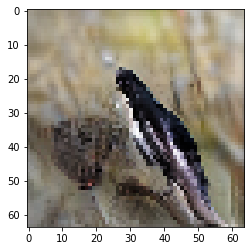

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 46

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.6449089050293 sec
Gen loss: 8.453192130659977, Gen valid loss: 1.340922751400852, Gen attr loss: 3.5150668440149406, Gen caption loss: 3.5972025607659566, Disc valid loss: 1.0687104043598743, Disc valid real loss: 0.5446822052887139, Disc valid fake loss: 0.524028197052033, Disc attr loss: 6.657554760857972, Disc attr real loss: 3.1424879168430317, Disc attr fake loss: 3.5150668440149406
Time for epoch 2 is 37.88569712638855 sec
Gen loss: 8.410835029633065, Gen valid loss: 1.3195124334759183, Gen attr loss: 3.501216965316111, Gen caption loss: 3.5901056473171162, Disc valid loss: 1.067980275406101, Disc valid real loss: 0.545987918528761, Disc valid fake loss: 0.5219923580080513, Disc attr loss: 6.642259948621921, Disc attr real loss: 3.1410429833058098, Disc attr fake loss: 3.501216965316111
Time for epoch 3 is 37.81623387336731 sec
Gen loss: 8.41

Time for epoch 21 is 37.71265745162964 sec
Gen loss: 8.412592345136938, Gen valid loss: 1.3231801967310712, Gen attr loss: 3.49746415931681, Gen caption loss: 3.591947949029566, Disc valid loss: 1.0767114735877288, Disc valid real loss: 0.5498209443034195, Disc valid fake loss: 0.5268905302534904, Disc attr loss: 6.635752234032483, Disc attr real loss: 3.138288074715674, Disc attr fake loss: 3.49746415931681
Time for epoch 22 is 37.72039318084717 sec
Gen loss: 8.462589316897922, Gen valid loss: 1.3374654692686023, Gen attr loss: 3.5189736974917776, Gen caption loss: 3.606150144483985, Disc valid loss: 1.0632190537969595, Disc valid real loss: 0.5424966291198886, Disc valid fake loss: 0.5207224226579433, Disc attr loss: 6.657254822532013, Disc attr real loss: 3.138281125040235, Disc attr fake loss: 3.5189736974917776
Time for epoch 23 is 37.72285580635071 sec
Gen loss: 8.474919802451199, Gen valid loss: 1.3513245845874797, Gen attr loss: 3.518578495759628, Gen caption loss: 3.6050167109

Time for epoch 41 is 37.58194947242737 sec
Gen loss: 8.41783026692667, Gen valid loss: 1.3358159564374907, Gen attr loss: 3.4954434126050167, Gen caption loss: 3.5865709019224172, Disc valid loss: 1.0679246765488208, Disc valid real loss: 0.5434801937118778, Disc valid fake loss: 0.5244444845330102, Disc attr loss: 6.632312039372721, Disc attr real loss: 3.1368686267677037, Disc attr fake loss: 3.4954434126050167
Time for epoch 42 is 37.63320064544678 sec
Gen loss: 8.430114115479839, Gen valid loss: 1.334107932036485, Gen attr loss: 3.5068071857700502, Gen caption loss: 3.5891990105957197, Disc valid loss: 1.064038980297926, Disc valid real loss: 0.542796521167445, Disc valid fake loss: 0.5212424605842528, Disc attr loss: 6.643290615340235, Disc attr real loss: 3.1364834295701853, Disc attr fake loss: 3.5068071857700502
Time for epoch 43 is 37.65757393836975 sec
Gen loss: 8.434569360117925, Gen valid loss: 1.3395887028557176, Gen attr loss: 3.5021984480260833, Gen caption loss: 3.59278

Time for epoch 61 is 37.87816309928894 sec
Gen loss: 8.486692902841542, Gen valid loss: 1.3401145857524097, Gen attr loss: 3.528487113756216, Gen caption loss: 3.6180912123786078, Disc valid loss: 1.0670987054261412, Disc valid real loss: 0.5463188940755074, Disc valid fake loss: 0.5207798118352244, Disc attr loss: 6.66360952343721, Disc attr real loss: 3.1351224096809944, Disc attr fake loss: 3.528487113756216
Time for epoch 62 is 37.85030698776245 sec
Gen loss: 8.378927089980625, Gen valid loss: 1.320020839289275, Gen attr loss: 3.481065163444374, Gen caption loss: 3.577841088054626, Disc valid loss: 1.0730249889820895, Disc valid real loss: 0.5487709067216734, Disc valid fake loss: 0.5242540838757181, Disc attr loss: 6.616271145944673, Disc attr real loss: 3.1352059825002985, Disc attr fake loss: 3.481065163444374
Time for epoch 63 is 37.752859115600586 sec
Gen loss: 8.40520982819844, Gen valid loss: 1.3246040977436675, Gen attr loss: 3.4976026856802345, Gen caption loss: 3.58300304

Time for epoch 81 is 37.87722587585449 sec
Gen loss: 8.470714437283151, Gen valid loss: 1.3304783291609952, Gen attr loss: 3.5264269110310047, Gen caption loss: 3.6138092263281183, Disc valid loss: 1.0715065464417786, Disc valid real loss: 0.5455253306766189, Disc valid fake loss: 0.5259812165728106, Disc attr loss: 6.657075933001551, Disc attr real loss: 3.130649021970547, Disc attr fake loss: 3.5264269110310047
Time for epoch 82 is 37.64674973487854 sec
Gen loss: 8.421468902732622, Gen valid loss: 1.336819910260074, Gen attr loss: 3.4984780210789626, Gen caption loss: 3.586171008060941, Disc valid loss: 1.0642733302542833, Disc valid real loss: 0.5412297285992279, Disc valid fake loss: 0.5230435998782232, Disc attr loss: 6.629284180276763, Disc attr real loss: 3.1308061591977996, Disc attr fake loss: 3.4984780210789626
Time for epoch 83 is 37.863187313079834 sec
Gen loss: 8.410380778273916, Gen valid loss: 1.324384028834056, Gen attr loss: 3.497242764728825, Gen caption loss: 3.58875

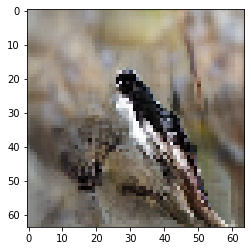

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 47

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.907832860946655 sec
Gen loss: 8.550017906075247, Gen valid loss: 1.3278738450874805, Gen attr loss: 3.5659930040519736, Gen caption loss: 3.6561510737349345, Disc valid loss: 1.0712188865111125, Disc valid real loss: 0.5535220336623308, Disc valid fake loss: 0.5176968505873589, Disc attr loss: 6.694197530022804, Disc attr real loss: 3.128204525970831, Disc attr fake loss: 3.5659930040519736
Time for epoch 2 is 37.777016162872314 sec
Gen loss: 8.398446201955077, Gen valid loss: 1.3205173496954485, Gen attr loss: 3.4951530323442084, Gen caption loss: 3.582775814423393, Disc valid loss: 1.0709921213669507, Disc valid real loss: 0.545790791834596, Disc valid fake loss: 0.5252013289669988, Disc attr loss: 6.623931752310859, Disc attr real loss: 3.128778719966651, Disc attr fake loss: 3.4951530323442084
Time for epoch 3 is 37.9040584564209 sec
Gen loss: 

Time for epoch 21 is 37.7950599193573 sec
Gen loss: 8.424212751672844, Gen valid loss: 1.3252690442532382, Gen attr loss: 3.507422623595571, Gen caption loss: 3.5915211054690808, Disc valid loss: 1.0726506855429672, Disc valid real loss: 0.5480510480197142, Disc valid fake loss: 0.5245996387347296, Disc attr loss: 6.633512680446552, Disc attr real loss: 3.1260900568509813, Disc attr fake loss: 3.507422623595571
Time for epoch 22 is 37.74416661262512 sec
Gen loss: 8.382824022918536, Gen valid loss: 1.3292470613146217, Gen attr loss: 3.480209799639901, Gen caption loss: 3.5733671569565773, Disc valid loss: 1.0687671919179156, Disc valid real loss: 0.5485751886516406, Disc valid fake loss: 0.5201920043969865, Disc attr loss: 6.606257079416498, Disc attr real loss: 3.1260472797765964, Disc attr fake loss: 3.480209799639901
Time for epoch 23 is 38.045183420181274 sec
Gen loss: 8.545362449273831, Gen valid loss: 1.3453767457951697, Gen attr loss: 3.5615791389289586, Gen caption loss: 3.63840

Time for epoch 41 is 38.1039834022522 sec
Gen loss: 8.423446803881223, Gen valid loss: 1.3365961301940565, Gen attr loss: 3.500703108666066, Gen caption loss: 3.586147582304833, Disc valid loss: 1.0695515895277503, Disc valid real loss: 0.5486402794274534, Disc valid fake loss: 0.5209113097772365, Disc attr loss: 6.62716205720979, Disc attr real loss: 3.1264589485437244, Disc attr fake loss: 3.500703108666066
Time for epoch 42 is 37.813714027404785 sec
Gen loss: 8.452508178183702, Gen valid loss: 1.3294609917534723, Gen attr loss: 3.5230130871460044, Gen caption loss: 3.6000341109144007, Disc valid loss: 1.0690508213469652, Disc valid real loss: 0.5477247363345087, Disc valid fake loss: 0.5213260859816378, Disc attr loss: 6.648640698533717, Disc attr real loss: 3.125627611387713, Disc attr fake loss: 3.5230130871460044
Time for epoch 43 is 38.05171203613281 sec
Gen loss: 8.415268421173096, Gen valid loss: 1.3227274353265117, Gen attr loss: 3.500027908542292, Gen caption loss: 3.5925130

Time for epoch 61 is 37.996253967285156 sec
Gen loss: 8.411069922977024, Gen valid loss: 1.3256531046011906, Gen attr loss: 3.4993510963470955, Gen caption loss: 3.5860657155675293, Disc valid loss: 1.0741059894807294, Disc valid real loss: 0.5475816499734636, Disc valid fake loss: 0.5265243359536014, Disc attr loss: 6.6208156576647665, Disc attr real loss: 3.1214645613176715, Disc attr fake loss: 3.4993510963470955
Time for epoch 62 is 37.83190107345581 sec
Gen loss: 8.410889498909638, Gen valid loss: 1.313136677916457, Gen attr loss: 3.506035419660532, Gen caption loss: 3.5917173892178833, Disc valid loss: 1.0737077962092267, Disc valid real loss: 0.5459351730217455, Disc valid fake loss: 0.5277726228644208, Disc attr loss: 6.627797269239658, Disc attr real loss: 3.1217618495791264, Disc attr fake loss: 3.506035419660532
Time for epoch 63 is 37.94515132904053 sec
Gen loss: 8.454865960893915, Gen valid loss: 1.3417733613714615, Gen attr loss: 3.512663816048847, Gen caption loss: 3.600

Time for epoch 81 is 38.08492588996887 sec
Gen loss: 8.387835483240888, Gen valid loss: 1.3246380171478602, Gen attr loss: 3.4870675159340627, Gen caption loss: 3.576129948866723, Disc valid loss: 1.0735997885546387, Disc valid real loss: 0.5484654544814815, Disc valid fake loss: 0.525134334719278, Disc attr loss: 6.605859883109406, Disc attr real loss: 3.1187923671753426, Disc attr fake loss: 3.4870675159340627
Time for epoch 82 is 37.97242975234985 sec
Gen loss: 8.502160943297513, Gen valid loss: 1.3344213064447006, Gen attr loss: 3.541167543509465, Gen caption loss: 3.6265721120808507, Disc valid loss: 1.0608067974488586, Disc valid real loss: 0.5452243098560065, Disc valid fake loss: 0.5155824879159127, Disc attr loss: 6.659747810544683, Disc attr real loss: 3.118580267035218, Disc attr fake loss: 3.541167543509465
Time for epoch 83 is 37.985435485839844 sec
Gen loss: 8.43238243630262, Gen valid loss: 1.3206062533345002, Gen attr loss: 3.512756485279983, Gen caption loss: 3.5990196

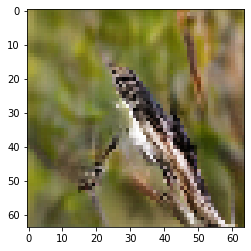

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 48

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.086599826812744 sec
Gen loss: 8.472046650522124, Gen valid loss: 1.3030147213276808, Gen attr loss: 3.5409172892893555, Gen caption loss: 3.6281146130910735, Disc valid loss: 1.0809622696098597, Disc valid real loss: 0.554327852519224, Disc valid fake loss: 0.5266344164445148, Disc attr loss: 6.6574178588422654, Disc attr real loss: 3.11650056955291, Disc attr fake loss: 3.5409172892893555
Time for epoch 2 is 38.00140690803528 sec
Gen loss: 8.431612602740445, Gen valid loss: 1.3262106454792384, Gen attr loss: 3.5089930583467974, Gen caption loss: 3.5964089157135506, Disc valid loss: 1.0674774897130848, Disc valid real loss: 0.5477427087502105, Disc valid fake loss: 0.5197347826589414, Disc attr loss: 6.626876933141776, Disc attr real loss: 3.117883874794978, Disc attr fake loss: 3.5089930583467974
Time for epoch 3 is 38.23446488380432 sec
Gen loss:

Time for epoch 21 is 38.15395498275757 sec
Gen loss: 8.458024098621152, Gen valid loss: 1.3299392232403846, Gen attr loss: 3.5218544497399473, Gen caption loss: 3.6062304230563362, Disc valid loss: 1.066432701539864, Disc valid real loss: 0.5432745084206909, Disc valid fake loss: 0.5231581973997235, Disc attr loss: 6.6376847316256065, Disc attr real loss: 3.1158302818856587, Disc attr fake loss: 3.5218544497399473
Time for epoch 22 is 38.165607929229736 sec
Gen loss: 8.454145838574666, Gen valid loss: 1.3212816256494704, Gen attr loss: 3.5231953216439016, Gen caption loss: 3.609668869313186, Disc valid loss: 1.0723787746455289, Disc valid real loss: 0.5469095547832448, Disc valid fake loss: 0.5254692204276398, Disc attr loss: 6.636562629120783, Disc attr real loss: 3.113367307476881, Disc attr fake loss: 3.5231953216439016
Time for epoch 23 is 38.20967483520508 sec
Gen loss: 8.414165821178818, Gen valid loss: 1.3292138725115354, Gen attr loss: 3.4993957452334685, Gen caption loss: 3.58

Time for epoch 41 is 38.015334129333496 sec
Gen loss: 8.408009045815403, Gen valid loss: 1.3221295265970514, Gen attr loss: 3.497300403227974, Gen caption loss: 3.5885791022603106, Disc valid loss: 1.0735906375455986, Disc valid real loss: 0.5493723304291082, Disc valid fake loss: 0.5242183077626112, Disc attr loss: 6.609750925363887, Disc attr real loss: 3.1124505221359127, Disc attr fake loss: 3.497300403227974
Time for epoch 42 is 38.05723714828491 sec
Gen loss: 8.40262176803134, Gen valid loss: 1.333387935387733, Gen attr loss: 3.4879366854018956, Gen caption loss: 3.581297170825121, Disc valid loss: 1.0673057667931245, Disc valid real loss: 0.5456970770184587, Disc valid fake loss: 0.5216086904207865, Disc attr loss: 6.5995899694075755, Disc attr real loss: 3.1116532840056794, Disc attr fake loss: 3.4879366854018956
Time for epoch 43 is 38.01533770561218 sec
Gen loss: 8.378458484401548, Gen valid loss: 1.3198676805509137, Gen attr loss: 3.4897116975086493, Gen caption loss: 3.5688

Time for epoch 61 is 38.272648334503174 sec
Gen loss: 8.404182222154406, Gen valid loss: 1.3219389640864965, Gen attr loss: 3.4974953217235036, Gen caption loss: 3.5847479715579893, Disc valid loss: 1.0750940920214667, Disc valid real loss: 0.550208523909897, Disc valid fake loss: 0.5248855674654488, Disc attr loss: 6.609103481297893, Disc attr real loss: 3.1116081595743896, Disc attr fake loss: 3.4974953217235036
Time for epoch 62 is 38.23474979400635 sec
Gen loss: 8.434389113087642, Gen valid loss: 1.3380854029642535, Gen attr loss: 3.5040626590490986, Gen caption loss: 3.5922410513973495, Disc valid loss: 1.0642555922996708, Disc valid real loss: 0.5432555051192358, Disc valid fake loss: 0.5210000854036027, Disc attr loss: 6.616301387306152, Disc attr real loss: 3.1122387282570525, Disc attr fake loss: 3.5040626590490986
Time for epoch 63 is 38.211811542510986 sec
Gen loss: 8.38511273789858, Gen valid loss: 1.3190846640243117, Gen attr loss: 3.487582197680383, Gen caption loss: 3.57

Time for epoch 81 is 38.23375082015991 sec
Gen loss: 8.439852910959301, Gen valid loss: 1.353791122514058, Gen attr loss: 3.505640676028037, Gen caption loss: 3.5804211053098767, Disc valid loss: 1.0623183657483357, Disc valid real loss: 0.5436661660994294, Disc valid fake loss: 0.5186521998104364, Disc attr loss: 6.615610758463542, Disc attr real loss: 3.1099700824355043, Disc attr fake loss: 3.505640676028037
Time for epoch 82 is 38.22178554534912 sec
Gen loss: 8.405115596647185, Gen valid loss: 1.3270040479132799, Gen attr loss: 3.49330496077292, Gen caption loss: 3.5848065663159376, Disc valid loss: 1.0717648949403427, Disc valid real loss: 0.5483953452045679, Disc valid fake loss: 0.5233695523202581, Disc attr loss: 6.602936150258795, Disc attr real loss: 3.1096311894858757, Disc attr fake loss: 3.49330496077292
Time for epoch 83 is 38.28661346435547 sec
Gen loss: 8.402666761300106, Gen valid loss: 1.323191199199294, Gen attr loss: 3.4979604408346865, Gen caption loss: 3.581515117

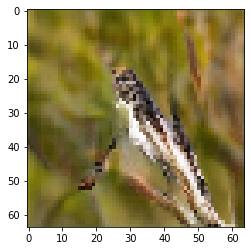

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 49

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.9816780090332 sec
Gen loss: 8.398479194175906, Gen valid loss: 1.3354134100885573, Gen attr loss: 3.4878855869375918, Gen caption loss: 3.5751801913346704, Disc valid loss: 1.0710423028242944, Disc valid real loss: 0.5496021668277782, Disc valid fake loss: 0.5214401368849323, Disc attr loss: 6.596323607090689, Disc attr real loss: 3.1084380201530974, Disc attr fake loss: 3.4878855869375918
Time for epoch 2 is 38.23127317428589 sec
Gen loss: 8.402437932446073, Gen valid loss: 1.319924851420126, Gen attr loss: 3.497344264493079, Gen caption loss: 3.5851688087794193, Disc valid loss: 1.073437442624472, Disc valid real loss: 0.5460821351384729, Disc valid fake loss: 0.5273553070821736, Disc attr loss: 6.605526669561701, Disc attr real loss: 3.1081824050686224, Disc attr fake loss: 3.497344264493079
Time for epoch 3 is 38.09819936752319 sec
Gen loss: 8.

Time for epoch 21 is 38.00835204124451 sec
Gen loss: 8.40597799218444, Gen valid loss: 1.3321695515133825, Gen attr loss: 3.4940573038447518, Gen caption loss: 3.5797511432875138, Disc valid loss: 1.0712821683909513, Disc valid real loss: 0.5472074440178186, Disc valid fake loss: 0.5240747243731325, Disc attr loss: 6.599962682904913, Disc attr real loss: 3.105905379060161, Disc attr fake loss: 3.4940573038447518
Time for epoch 22 is 38.13361167907715 sec
Gen loss: 8.39595541010704, Gen valid loss: 1.3265562776304518, Gen attr loss: 3.489674211517582, Gen caption loss: 3.579724950195974, Disc valid loss: 1.0703946836595613, Disc valid real loss: 0.5489672235841674, Disc valid fake loss: 0.5214274587023872, Disc attr loss: 6.595937153188194, Disc attr real loss: 3.106262941670612, Disc attr fake loss: 3.489674211517582
Time for epoch 23 is 37.92743229866028 sec
Gen loss: 8.366494588412566, Gen valid loss: 1.3175071497273638, Gen attr loss: 3.4794735992504005, Gen caption loss: 3.56951385

Time for epoch 41 is 38.09109306335449 sec
Gen loss: 8.387732509675065, Gen valid loss: 1.331738990658344, Gen attr loss: 3.4814940532694663, Gen caption loss: 3.574499466231845, Disc valid loss: 1.0724763758783418, Disc valid real loss: 0.5473312686290844, Disc valid fake loss: 0.5251451054724251, Disc attr loss: 6.582541785589078, Disc attr real loss: 3.101047732319612, Disc attr fake loss: 3.4814940532694663
Time for epoch 42 is 38.10081768035889 sec
Gen loss: 8.477129682938903, Gen valid loss: 1.3350628265520421, Gen attr loss: 3.5255802239828964, Gen caption loss: 3.6164866553412542, Disc valid loss: 1.0643347370915297, Disc valid real loss: 0.541856032965306, Disc valid fake loss: 0.5224787036416331, Disc attr loss: 6.626342121501602, Disc attr real loss: 3.100761897518706, Disc attr fake loss: 3.5255802239828964
Time for epoch 43 is 38.139811754226685 sec
Gen loss: 8.341904227972677, Gen valid loss: 1.3127814303568708, Gen attr loss: 3.4676207255541796, Gen caption loss: 3.56150

Time for epoch 61 is 38.03007411956787 sec
Gen loss: 8.390810586572663, Gen valid loss: 1.316730058290125, Gen attr loss: 3.487166309098241, Gen caption loss: 3.5869142169228736, Disc valid loss: 1.0818416203263652, Disc valid real loss: 0.5577929027196837, Disc valid fake loss: 0.524048717283621, Disc attr loss: 6.584528674278156, Disc attr real loss: 3.0973623651799147, Disc attr fake loss: 3.487166309098241
Time for epoch 62 is 38.01397490501404 sec
Gen loss: 8.373967266341213, Gen valid loss: 1.325658852168861, Gen attr loss: 3.4775162266521917, Gen caption loss: 3.5707921923660653, Disc valid loss: 1.0652105074910936, Disc valid real loss: 0.5435473427055327, Disc valid fake loss: 0.521663165673977, Disc attr loss: 6.57555413439991, Disc attr real loss: 3.0980379077477185, Disc attr fake loss: 3.4775162266521917
Time for epoch 63 is 38.010984897613525 sec
Gen loss: 8.33207975428925, Gen valid loss: 1.2963300363481207, Gen attr loss: 3.4740695526929404, Gen caption loss: 3.56168017

Time for epoch 81 is 37.88848090171814 sec
Gen loss: 8.432164556611845, Gen valid loss: 1.3386394218377629, Gen attr loss: 3.5048150163355882, Gen caption loss: 3.588710114238708, Disc valid loss: 1.0665762001259864, Disc valid real loss: 0.546881581790402, Disc valid fake loss: 0.5196946169625776, Disc attr loss: 6.601251164102942, Disc attr real loss: 3.0964361477673537, Disc attr fake loss: 3.5048150163355882
Time for epoch 82 is 37.87202715873718 sec
Gen loss: 8.379869862946714, Gen valid loss: 1.3228284128636203, Gen attr loss: 3.4869389798906116, Gen caption loss: 3.570102464215865, Disc valid loss: 1.074660524281706, Disc valid real loss: 0.5485988376424887, Disc valid fake loss: 0.5260616861546266, Disc attr loss: 6.582920873068212, Disc attr real loss: 3.095981893177601, Disc attr fake loss: 3.4869389798906116
Time for epoch 83 is 37.86908984184265 sec
Gen loss: 8.388452833584008, Gen valid loss: 1.3298114880636778, Gen attr loss: 3.4861851714167815, Gen caption loss: 3.572456

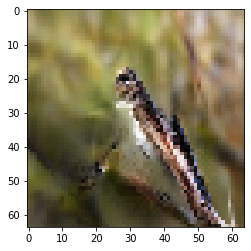

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 50

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.866440773010254 sec
Gen loss: 8.643770818787862, Gen valid loss: 1.3337666894685285, Gen attr loss: 3.61045548263281, Gen caption loss: 3.6995486567013955, Disc valid loss: 1.0666054752137926, Disc valid real loss: 0.5397673429350865, Disc valid fake loss: 0.5268381292096321, Disc attr loss: 6.704554095177793, Disc attr real loss: 3.0940986125449825, Disc attr fake loss: 3.61045548263281
Time for epoch 2 is 37.85843896865845 sec
Gen loss: 8.353306193984944, Gen valid loss: 1.3152956610449607, Gen attr loss: 3.4724050879801514, Gen caption loss: 3.56560545949755, Disc valid loss: 1.0826084704256962, Disc valid real loss: 0.5546443076314642, Disc valid fake loss: 0.5279641614212254, Disc attr loss: 6.565323624830582, Disc attr real loss: 3.0929185368504304, Disc attr fake loss: 3.4724050879801514
Time for epoch 3 is 37.919522285461426 sec
Gen loss: 8

Time for epoch 21 is 37.88596820831299 sec
Gen loss: 8.358467471631885, Gen valid loss: 1.3224508474835859, Gen attr loss: 3.4709313038564957, Gen caption loss: 3.5650853051079645, Disc valid loss: 1.074742560302662, Disc valid real loss: 0.5498635827041254, Disc valid fake loss: 0.5248789776793017, Disc attr loss: 6.561557270324004, Disc attr real loss: 3.0906259664675084, Disc attr fake loss: 3.4709313038564957
Time for epoch 22 is 37.890944480895996 sec
Gen loss: 8.338866952312024, Gen valid loss: 1.3111614754529504, Gen attr loss: 3.4688997785573408, Gen caption loss: 3.558805711870271, Disc valid loss: 1.0724049945510823, Disc valid real loss: 0.5463966330700127, Disc valid fake loss: 0.526008359461942, Disc attr loss: 6.560183378416025, Disc attr real loss: 3.0912835998586847, Disc attr fake loss: 3.4688997785573408
Time for epoch 23 is 37.860065937042236 sec
Gen loss: 8.373296183299242, Gen valid loss: 1.325754305211509, Gen attr loss: 3.4777114908223554, Gen caption loss: 3.569

Time for epoch 41 is 37.89392638206482 sec
Gen loss: 8.336058537811445, Gen valid loss: 1.3200998887783144, Gen attr loss: 3.4618176735513577, Gen caption loss: 3.554140948990819, Disc valid loss: 1.0766270915021094, Disc valid real loss: 0.5493259207019962, Disc valid fake loss: 0.5273011710424087, Disc attr loss: 6.552216397391425, Disc attr real loss: 3.0903987238400674, Disc attr fake loss: 3.4618176735513577
Time for epoch 42 is 37.870463848114014 sec
Gen loss: 8.443155903803301, Gen valid loss: 1.326816991092713, Gen attr loss: 3.515992456012302, Gen caption loss: 3.6003464618672525, Disc valid loss: 1.0692817857918056, Disc valid real loss: 0.5417950492564255, Disc valid fake loss: 0.5274867371815007, Disc attr loss: 6.604813608050669, Disc attr real loss: 3.0888211520383675, Disc attr fake loss: 3.515992456012302
Time for epoch 43 is 37.847240924835205 sec
Gen loss: 8.367043586927378, Gen valid loss: 1.3200766001613482, Gen attr loss: 3.480990680575694, Gen caption loss: 3.5659

Time for epoch 61 is 37.986552715301514 sec
Gen loss: 8.46328507787813, Gen valid loss: 1.3356932496959923, Gen attr loss: 3.516308075690334, Gen caption loss: 3.611283763637388, Disc valid loss: 1.0669917687167967, Disc valid real loss: 0.5444996163127868, Disc valid fake loss: 0.5224921515963588, Disc attr loss: 6.6019064675824755, Disc attr real loss: 3.085598391892141, Disc attr fake loss: 3.516308075690334
Time for epoch 62 is 38.005921363830566 sec
Gen loss: 8.366961660100838, Gen valid loss: 1.33544682745688, Gen attr loss: 3.4675916533483075, Gen caption loss: 3.563923185756859, Disc valid loss: 1.0626107313768651, Disc valid real loss: 0.5415679374684487, Disc valid fake loss: 0.521042797623611, Disc attr loss: 6.554584805558368, Disc attr real loss: 3.0869931522100598, Disc attr fake loss: 3.4675916533483075
Time for epoch 63 is 38.0594277381897 sec
Gen loss: 8.41742184103989, Gen valid loss: 1.3269846610583587, Gen attr loss: 3.506927354549005, Gen caption loss: 3.5835098373

Time for epoch 81 is 38.02025771141052 sec
Gen loss: 8.368587446083545, Gen valid loss: 1.332372554272494, Gen attr loss: 3.473615511323055, Gen caption loss: 3.5625993888875658, Disc valid loss: 1.0731038527113959, Disc valid real loss: 0.5467457729303417, Disc valid fake loss: 0.5263580767119803, Disc attr loss: 6.556226915783352, Disc attr real loss: 3.0826114044602972, Disc attr fake loss: 3.473615511323055
Time for epoch 82 is 38.04620122909546 sec
Gen loss: 8.33404556134852, Gen valid loss: 1.3165054899567188, Gen attr loss: 3.46057322613269, Gen caption loss: 3.556966856566225, Disc valid loss: 1.0746950487780378, Disc valid real loss: 0.5461806257565817, Disc valid fake loss: 0.5285144201946775, Disc attr loss: 6.542764951866171, Disc attr real loss: 3.0821917257334803, Disc attr fake loss: 3.46057322613269
Time for epoch 83 is 38.01539897918701 sec
Gen loss: 8.345418497152767, Gen valid loss: 1.3229338809403624, Gen attr loss: 3.465743935205103, Gen caption loss: 3.55674070136

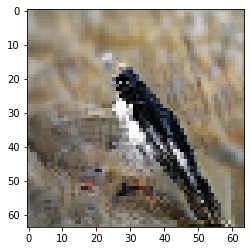

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 51

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.04351210594177 sec
Gen loss: 8.319181142460685, Gen valid loss: 1.3141258872621429, Gen attr loss: 3.4567679176485635, Gen caption loss: 3.548287329635, Disc valid loss: 1.083450943635408, Disc valid real loss: 0.5538312998729024, Disc valid fake loss: 0.5296196452162776, Disc attr loss: 6.536705804388052, Disc attr real loss: 3.0799378867394878, Disc attr fake loss: 3.4567679176485635
Time for epoch 2 is 38.02850341796875 sec
Gen loss: 8.379935295601202, Gen valid loss: 1.3246496681598467, Gen attr loss: 3.481408886793183, Gen caption loss: 3.573876754378239, Disc valid loss: 1.0703158706507385, Disc valid real loss: 0.5501583882463656, Disc valid fake loss: 0.5201574821620776, Disc attr loss: 6.56105296333954, Disc attr real loss: 3.0796440765463564, Disc attr fake loss: 3.481408886793183
Time for epoch 3 is 37.98717212677002 sec
Gen loss: 8.3569

Time for epoch 21 is 38.00366234779358 sec
Gen loss: 8.307763918951599, Gen valid loss: 1.315747842071502, Gen attr loss: 3.44504354510527, Gen caption loss: 3.5469725539044634, Disc valid loss: 1.0774420620949288, Disc valid real loss: 0.5492363113374891, Disc valid fake loss: 0.5282057521304464, Disc attr loss: 6.521693858673902, Disc attr real loss: 3.0766503135686323, Disc attr fake loss: 3.44504354510527
Time for epoch 22 is 38.01176309585571 sec
Gen loss: 8.33089425311825, Gen valid loss: 1.3208545082952918, Gen attr loss: 3.4574081148235454, Gen caption loss: 3.552631641144998, Disc valid loss: 1.0715966741567058, Disc valid real loss: 0.548642134763361, Disc valid fake loss: 0.5229545370511569, Disc attr loss: 6.533597120747657, Disc attr real loss: 3.0761890059241113, Disc attr fake loss: 3.4574081148235454
Time for epoch 23 is 38.002710819244385 sec
Gen loss: 8.350040417699633, Gen valid loss: 1.3084510921785826, Gen attr loss: 3.476926888876814, Gen caption loss: 3.564662430

Time for epoch 41 is 38.272961139678955 sec
Gen loss: 8.324566549078883, Gen valid loss: 1.3122213956140245, Gen attr loss: 3.456309436136468, Gen caption loss: 3.556035706667396, Disc valid loss: 1.0797062382142395, Disc valid real loss: 0.5491634532203519, Disc valid fake loss: 0.5305427862861292, Disc attr loss: 6.530607715208679, Disc attr real loss: 3.074298279072211, Disc attr fake loss: 3.456309436136468
Time for epoch 42 is 38.338637351989746 sec
Gen loss: 8.40619602694421, Gen valid loss: 1.3236665087663708, Gen attr loss: 3.496713961366069, Gen caption loss: 3.5858155337129505, Disc valid loss: 1.0699648934651196, Disc valid real loss: 0.5469558249482618, Disc valid fake loss: 0.5230090689206834, Disc attr loss: 6.571687162083985, Disc attr real loss: 3.0749732007179156, Disc attr fake loss: 3.496713961366069
Time for epoch 43 is 38.03391218185425 sec
Gen loss: 8.372803959420057, Gen valid loss: 1.3251045827620074, Gen attr loss: 3.4760770345444927, Gen caption loss: 3.571622

Time for epoch 61 is 38.231241941452026 sec
Gen loss: 8.329649642231018, Gen valid loss: 1.3262072662673992, Gen attr loss: 3.4561810183331247, Gen caption loss: 3.5472613582766153, Disc valid loss: 1.077022787355149, Disc valid real loss: 0.5527275849971668, Disc valid fake loss: 0.5242952051039956, Disc attr loss: 6.529615066884979, Disc attr real loss: 3.073434048551854, Disc attr fake loss: 3.4561810183331247
Time for epoch 62 is 37.97604179382324 sec
Gen loss: 8.345585307454675, Gen valid loss: 1.3164339479069076, Gen attr loss: 3.4647066535019295, Gen caption loss: 3.5644447021691135, Disc valid loss: 1.0729243532428896, Disc valid real loss: 0.549390552408973, Disc valid fake loss: 0.5235338025299837, Disc attr loss: 6.537751798707295, Disc attr real loss: 3.073045145205366, Disc attr fake loss: 3.4647066535019295
Time for epoch 63 is 38.22857880592346 sec
Gen loss: 8.330298560744701, Gen valid loss: 1.3147144889443871, Gen attr loss: 3.4619874508400272, Gen caption loss: 3.5535

Time for epoch 81 is 38.181012868881226 sec
Gen loss: 8.349294750348017, Gen valid loss: 1.3152966510635729, Gen attr loss: 3.4658110393741266, Gen caption loss: 3.5681870739634443, Disc valid loss: 1.0809161579059714, Disc valid real loss: 0.5522402712323156, Disc valid fake loss: 0.5286758848968237, Disc attr loss: 6.534675218871615, Disc attr real loss: 3.068864179497489, Disc attr fake loss: 3.4658110393741266
Time for epoch 82 is 38.21766424179077 sec
Gen loss: 8.313120449138527, Gen valid loss: 1.3159622701849072, Gen attr loss: 3.4481167043773784, Gen caption loss: 3.549041472153289, Disc valid loss: 1.0723786517210445, Disc valid real loss: 0.5474368718258411, Disc valid fake loss: 0.5249417800567338, Disc attr loss: 6.516016799906082, Disc attr real loss: 3.0679000955287035, Disc attr fake loss: 3.4481167043773784
Time for epoch 83 is 38.226205825805664 sec
Gen loss: 8.332554709943652, Gen valid loss: 1.3133225272987594, Gen attr loss: 3.460632757119693, Gen caption loss: 3.55

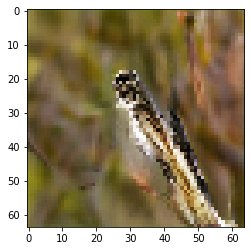

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 52

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.00046944618225 sec
Gen loss: 8.400089232902216, Gen valid loss: 1.3236167732939164, Gen attr loss: 3.4890588576877666, Gen caption loss: 3.5874136108046946, Disc valid loss: 1.0714138432893003, Disc valid real loss: 0.5510219986522747, Disc valid fake loss: 0.5203918454446766, Disc attr loss: 6.556711797145647, Disc attr real loss: 3.0676529394578806, Disc attr fake loss: 3.4890588576877666
Time for epoch 2 is 37.96568036079407 sec
Gen loss: 8.32046440558705, Gen valid loss: 1.3250952375936638, Gen attr loss: 3.4469791492472495, Gen caption loss: 3.5483900337684444, Disc valid loss: 1.0722227201552248, Disc valid real loss: 0.54612222378493, Disc valid fake loss: 0.5261004949972882, Disc attr loss: 6.514508847944782, Disc attr real loss: 3.0675296986975322, Disc attr fake loss: 3.4469791492472495
Time for epoch 3 is 38.25010633468628 sec
Gen loss: 

Time for epoch 21 is 38.133623361587524 sec
Gen loss: 8.388994242763777, Gen valid loss: 1.3321756676929752, Gen attr loss: 3.4784602046335937, Gen caption loss: 3.578358389174712, Disc valid loss: 1.070597378703637, Disc valid real loss: 0.5456748015996886, Disc valid fake loss: 0.5249225763770623, Disc attr loss: 6.5446541361046355, Disc attr real loss: 3.0661939314710414, Disc attr fake loss: 3.4784602046335937
Time for epoch 22 is 38.142147064208984 sec
Gen loss: 8.371231160512785, Gen valid loss: 1.3457862750947638, Gen attr loss: 3.4639821369150465, Gen caption loss: 3.5614627415571753, Disc valid loss: 1.0580323690644449, Disc valid real loss: 0.5436037710204034, Disc valid fake loss: 0.514428595298028, Disc attr loss: 6.529238656930484, Disc attr real loss: 3.0652565200154376, Disc attr fake loss: 3.4639821369150465
Time for epoch 23 is 38.1379873752594 sec
Gen loss: 8.325663239652226, Gen valid loss: 1.3351254262898349, Gen attr loss: 3.45048755100426, Gen caption loss: 3.5400

Time for epoch 41 is 37.74239659309387 sec
Gen loss: 8.287309177522737, Gen valid loss: 1.3165831824305259, Gen attr loss: 3.4352828655139542, Gen caption loss: 3.5354431250554113, Disc valid loss: 1.0816845217048314, Disc valid real loss: 0.5514460769772207, Disc valid fake loss: 0.5302384452122014, Disc attr loss: 6.499566575375999, Disc attr real loss: 3.064283709862045, Disc attr fake loss: 3.4352828655139542
Time for epoch 42 is 37.93837285041809 sec
Gen loss: 9.093876640971114, Gen valid loss: 1.3707949139561433, Gen attr loss: 3.8190907695429113, Gen caption loss: 3.90399096587163, Disc valid loss: 1.0513486997867987, Disc valid real loss: 0.5400794127446203, Disc valid fake loss: 0.5112692865575879, Disc attr loss: 6.890820574631213, Disc attr real loss: 3.0717298050883017, Disc attr fake loss: 3.8190907695429113
Time for epoch 43 is 37.722172498703 sec
Gen loss: 8.3489311406929, Gen valid loss: 1.333841112571034, Gen attr loss: 3.4568487027796304, Gen caption loss: 3.558241335

Time for epoch 61 is 37.77540135383606 sec
Gen loss: 8.345989569738952, Gen valid loss: 1.3084581080814042, Gen attr loss: 3.471930176261964, Gen caption loss: 3.56560129072608, Disc valid loss: 1.0827180510613976, Disc valid real loss: 0.5561134799063044, Disc valid fake loss: 0.5266045712358584, Disc attr loss: 6.534377060608489, Disc attr real loss: 3.0624468843465253, Disc attr fake loss: 3.471930176261964
Time for epoch 62 is 37.751173973083496 sec
Gen loss: 8.303944807388595, Gen valid loss: 1.314190712078477, Gen attr loss: 3.44208097651722, Gen caption loss: 3.547673079379529, Disc valid loss: 1.0729516297174986, Disc valid real loss: 0.5478898384545231, Disc valid fake loss: 0.5250617929590427, Disc attr loss: 6.502081170637756, Disc attr real loss: 3.060000194120536, Disc attr fake loss: 3.44208097651722
Time for epoch 63 is 37.72118949890137 sec
Gen loss: 8.35112846963774, Gen valid loss: 1.3288790940592283, Gen attr loss: 3.4629082240386384, Gen caption loss: 3.559341147017

Time for epoch 81 is 38.0664267539978 sec
Gen loss: 8.275654773402021, Gen valid loss: 1.3101557305834803, Gen attr loss: 3.429373196470059, Gen caption loss: 3.5361258447331787, Disc valid loss: 1.0877950390179951, Disc valid real loss: 0.5574140937186192, Disc valid fake loss: 0.5303809458647317, Disc attr loss: 6.486416655181223, Disc attr real loss: 3.057043458711164, Disc attr fake loss: 3.429373196470059
Time for epoch 82 is 37.7553825378418 sec
Gen loss: 8.305795239239204, Gen valid loss: 1.3183517960028919, Gen attr loss: 3.443504797410836, Gen caption loss: 3.543938641302631, Disc valid loss: 1.0687614134979766, Disc valid real loss: 0.5442155010816527, Disc valid fake loss: 0.5245459098318405, Disc attr loss: 6.501695695608289, Disc attr real loss: 3.058190898197453, Disc attr fake loss: 3.443504797410836
Time for epoch 83 is 38.0888786315918 sec
Gen loss: 8.302037660345476, Gen valid loss: 1.3273513187883992, Gen attr loss: 3.4344649773626146, Gen caption loss: 3.54022137970

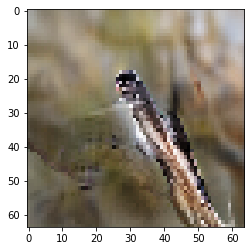

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 53

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.13350248336792 sec
Gen loss: 8.365591524739253, Gen valid loss: 1.3121701201126181, Gen attr loss: 3.475915736945341, Gen caption loss: 3.577505682219012, Disc valid loss: 1.0817591325054323, Disc valid real loss: 0.5535426182637047, Disc valid fake loss: 0.5282165143224928, Disc attr loss: 6.532984097152545, Disc attr real loss: 3.0570683602072037, Disc attr fake loss: 3.475915736945341
Time for epoch 2 is 37.89882159233093 sec
Gen loss: 8.349725700006253, Gen valid loss: 1.313921458352872, Gen attr loss: 3.470074283398264, Gen caption loss: 3.565729964393264, Disc valid loss: 1.0725513951888253, Disc valid real loss: 0.5480335801436003, Disc valid fake loss: 0.5245178134299229, Disc attr loss: 6.525767504361264, Disc attr real loss: 3.055693220963, Disc attr fake loss: 3.470074283398264
Time for epoch 3 is 38.12985348701477 sec
Gen loss: 8.297127

Time for epoch 21 is 37.987504959106445 sec
Gen loss: 8.313234760832334, Gen valid loss: 1.335675362972063, Gen attr loss: 3.4384661438019295, Gen caption loss: 3.5390932721497244, Disc valid loss: 1.0716046451876158, Disc valid real loss: 0.5487916034250079, Disc valid fake loss: 0.5228130430548494, Disc attr loss: 6.490110500072076, Disc attr real loss: 3.0516443562701467, Disc attr fake loss: 3.4384661438019295
Time for epoch 22 is 38.022226333618164 sec
Gen loss: 8.276330079489608, Gen valid loss: 1.306387892260461, Gen attr loss: 3.435049079621064, Gen caption loss: 3.534893109546444, Disc valid loss: 1.0808598953210888, Disc valid real loss: 0.5504046668851279, Disc valid fake loss: 0.5304552273052495, Disc attr loss: 6.487565987155366, Disc attr real loss: 3.052516907534302, Disc attr fake loss: 3.435049079621064
Time for epoch 23 is 37.991206645965576 sec
Gen loss: 8.312950405648085, Gen valid loss: 1.3196263153378556, Gen attr loss: 3.4456650713271886, Gen caption loss: 3.5476

Time for epoch 41 is 38.05030798912048 sec
Gen loss: 8.391365840829161, Gen valid loss: 1.329485938154908, Gen attr loss: 3.4906751599092147, Gen caption loss: 3.5712047437342203, Disc valid loss: 1.0644618371314796, Disc valid real loss: 0.5430571515224167, Disc valid fake loss: 0.5214046877089554, Disc attr loss: 6.5432085693690185, Disc attr real loss: 3.0525334094598042, Disc attr fake loss: 3.4906751599092147
Time for epoch 42 is 37.99258494377136 sec
Gen loss: 8.324955034385205, Gen valid loss: 1.3380336296267625, Gen attr loss: 3.4433450065654143, Gen caption loss: 3.543576392377941, Disc valid loss: 1.0633344070375128, Disc valid real loss: 0.5441167770524012, Disc valid fake loss: 0.5192176339426015, Disc attr loss: 6.494223877020322, Disc attr real loss: 3.0508788704549072, Disc attr fake loss: 3.4433450065654143
Time for epoch 43 is 37.98445129394531 sec
Gen loss: 8.301071430609479, Gen valid loss: 1.326375496742848, Gen attr loss: 3.4408099942091033, Gen caption loss: 3.533

Time for epoch 61 is 37.98240876197815 sec
Gen loss: 8.279996950774981, Gen valid loss: 1.3168434235784743, Gen attr loss: 3.4318598395763695, Gen caption loss: 3.5312936809973987, Disc valid loss: 1.0817447312802158, Disc valid real loss: 0.5518105729485592, Disc valid fake loss: 0.5299341563125289, Disc attr loss: 6.481821371610895, Disc attr real loss: 3.049961532034525, Disc attr fake loss: 3.4318598395763695
Time for epoch 62 is 38.011967182159424 sec
Gen loss: 8.270687325537043, Gen valid loss: 1.3139141045288665, Gen attr loss: 3.4290871238966942, Gen caption loss: 3.527686105511053, Disc valid loss: 1.072940084507795, Disc valid real loss: 0.5472482896755705, Disc valid fake loss: 0.5256917940245734, Disc attr loss: 6.478040022255605, Disc attr real loss: 3.048952898358911, Disc attr fake loss: 3.4290871238966942
Time for epoch 63 is 38.03656339645386 sec
Gen loss: 8.29002853202303, Gen valid loss: 1.3005599232547005, Gen attr loss: 3.4478454854753284, Gen caption loss: 3.54162

Time for epoch 81 is 37.78658318519592 sec
Gen loss: 8.310493088027004, Gen valid loss: 1.317067267771982, Gen attr loss: 3.4486383551827613, Gen caption loss: 3.5447874657183807, Disc valid loss: 1.0771905678074534, Disc valid real loss: 0.5532838248301973, Disc valid fake loss: 0.523906742977256, Disc attr loss: 6.49734336509291, Disc attr real loss: 3.048705009910149, Disc attr fake loss: 3.4486383551827613
Time for epoch 82 is 37.84783458709717 sec
Gen loss: 8.29769741616598, Gen valid loss: 1.3232500281760362, Gen attr loss: 3.439289135661552, Gen caption loss: 3.535158275588741, Disc valid loss: 1.0708238677926827, Disc valid real loss: 0.5490983642213713, Disc valid fake loss: 0.5217255036520764, Disc attr loss: 6.4880103044070525, Disc attr real loss: 3.048721168745501, Disc attr fake loss: 3.439289135661552
Time for epoch 83 is 37.84951424598694 sec
Gen loss: 8.276126480360988, Gen valid loss: 1.3189760986059338, Gen attr loss: 3.428653507697873, Gen caption loss: 3.5284968934

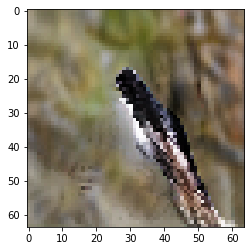

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 54

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.98818922042847 sec
Gen loss: 8.321122144942038, Gen valid loss: 1.3359068913188408, Gen attr loss: 3.443039010210735, Gen caption loss: 3.5421762472891873, Disc valid loss: 1.0712321337645616, Disc valid real loss: 0.5467397798367633, Disc valid fake loss: 0.5244923541700937, Disc attr loss: 6.48992857765053, Disc attr real loss: 3.0468895674397953, Disc attr fake loss: 3.443039010210735
Time for epoch 2 is 37.705150842666626 sec
Gen loss: 8.30918779347324, Gen valid loss: 1.3145543178568688, Gen attr loss: 3.4535224017735096, Gen caption loss: 3.5411110912881245, Disc valid loss: 1.0762165161329234, Disc valid real loss: 0.5463241593139928, Disc valid fake loss: 0.5298923568996957, Disc attr loss: 6.5009008584629875, Disc attr real loss: 3.047378456689478, Disc attr fake loss: 3.4535224017735096
Time for epoch 3 is 37.87334227561951 sec
Gen loss: 

Time for epoch 21 is 37.84672522544861 sec
Gen loss: 8.414255859406014, Gen valid loss: 1.3253228696704233, Gen attr loss: 3.505210588294962, Gen caption loss: 3.583722429223823, Disc valid loss: 1.0741019408877304, Disc valid real loss: 0.5471051542901089, Disc valid fake loss: 0.5269967844169637, Disc attr loss: 6.552244775340486, Disc attr real loss: 3.047034187045524, Disc attr fake loss: 3.505210588294962
Time for epoch 22 is 37.84933257102966 sec
Gen loss: 8.29763358330662, Gen valid loss: 1.30713781803281, Gen attr loss: 3.4439252560054707, Gen caption loss: 3.546570499414997, Disc valid loss: 1.079970312796957, Disc valid real loss: 0.5530751942780606, Disc valid fake loss: 0.5268951215879704, Disc attr loss: 6.489394263523381, Disc attr real loss: 3.04546900751791, Disc attr fake loss: 3.4439252560054707
Time for epoch 23 is 37.88436460494995 sec
Gen loss: 8.312231769406699, Gen valid loss: 1.3092725790613067, Gen attr loss: 3.453673155973274, Gen caption loss: 3.5492860301723

Time for epoch 41 is 37.83420395851135 sec
Gen loss: 8.368186814998223, Gen valid loss: 1.3082881264570283, Gen attr loss: 3.4728110637768173, Gen caption loss: 3.5870876131342033, Disc valid loss: 1.0824323206090023, Disc valid real loss: 0.5548420760043591, Disc valid fake loss: 0.5275902446854083, Disc attr loss: 6.517671629342283, Disc attr real loss: 3.044860565565466, Disc attr fake loss: 3.4728110637768173
Time for epoch 42 is 37.867374897003174 sec
Gen loss: 8.350607296961757, Gen valid loss: 1.3310361078115014, Gen attr loss: 3.4617440984824164, Gen caption loss: 3.5578271211970467, Disc valid loss: 1.0653311359850048, Disc valid real loss: 0.5444469405868189, Disc valid fake loss: 0.520884193863649, Disc attr loss: 6.505447478475286, Disc attr real loss: 3.0437033799928703, Disc attr fake loss: 3.4617440984824164
Time for epoch 43 is 37.81091237068176 sec
Gen loss: 8.274971061282688, Gen valid loss: 1.3121134260805642, Gen attr loss: 3.4351468771130733, Gen caption loss: 3.52

Time for epoch 61 is 37.689576148986816 sec
Gen loss: 8.338897963526449, Gen valid loss: 1.3211133987276857, Gen attr loss: 3.4574701191610115, Gen caption loss: 3.5603144420840875, Disc valid loss: 1.0739450372331512, Disc valid real loss: 0.5514769365147847, Disc valid fake loss: 0.5224681024144335, Disc attr loss: 6.499744465034506, Disc attr real loss: 3.042274345873494, Disc attr fake loss: 3.4574701191610115
Time for epoch 62 is 37.74307441711426 sec
Gen loss: 8.290092808121265, Gen valid loss: 1.3175570347767858, Gen attr loss: 3.4355816821741865, Gen caption loss: 3.5369540669407624, Disc valid loss: 1.0759035867404163, Disc valid real loss: 0.5460876909697928, Disc valid fake loss: 0.5298158957706234, Disc attr loss: 6.477147438338778, Disc attr real loss: 3.041565756164592, Disc attr fake loss: 3.4355816821741865
Time for epoch 63 is 37.667017459869385 sec
Gen loss: 8.306728117511202, Gen valid loss: 1.319750467936198, Gen attr loss: 3.4431329658684047, Gen caption loss: 3.54

Time for epoch 81 is 37.66102337837219 sec
Gen loss: 8.401430885966231, Gen valid loss: 1.331758810252678, Gen attr loss: 3.485816587277544, Gen caption loss: 3.5838554745444116, Disc valid loss: 1.0713910815838552, Disc valid real loss: 0.5446639636829294, Disc valid fake loss: 0.5267271174971004, Disc attr loss: 6.524035873774913, Disc attr real loss: 3.038219286497369, Disc attr fake loss: 3.485816587277544
Time for epoch 82 is 37.784820556640625 sec
Gen loss: 8.320743801147957, Gen valid loss: 1.322963492657111, Gen attr loss: 3.450220519611183, Gen caption loss: 3.547559782095395, Disc valid loss: 1.0704020978958626, Disc valid real loss: 0.5482382820389136, Disc valid fake loss: 0.522163816583835, Disc attr loss: 6.487913904797417, Disc attr real loss: 3.037693385186234, Disc attr fake loss: 3.450220519611183
Time for epoch 83 is 37.7809042930603 sec
Gen loss: 8.292381607097015, Gen valid loss: 1.324005495241987, Gen attr loss: 3.433650001923889, Gen caption loss: 3.5347260860246

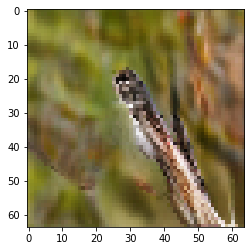

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 55

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.77425765991211 sec
Gen loss: 8.305718461995525, Gen valid loss: 1.3216481562552413, Gen attr loss: 3.4459986693167752, Gen caption loss: 3.5380716543533617, Disc valid loss: 1.076774696993634, Disc valid real loss: 0.5477612998265884, Disc valid fake loss: 0.5290133999938241, Disc attr loss: 6.484135112788296, Disc attr real loss: 3.038136443471521, Disc attr fake loss: 3.4459986693167752
Time for epoch 2 is 37.750709772109985 sec
Gen loss: 8.306045869501625, Gen valid loss: 1.3266326702707183, Gen attr loss: 3.441886286748457, Gen caption loss: 3.5375269092518464, Disc valid loss: 1.0654184269065132, Disc valid real loss: 0.5453763365907075, Disc valid fake loss: 0.5200420867621414, Disc attr loss: 6.4788296132229855, Disc attr real loss: 3.0369433264745282, Disc attr fake loss: 3.441886286748457
Time for epoch 3 is 38.05457949638367 sec
Gen loss:

Time for epoch 21 is 37.61276078224182 sec
Gen loss: 8.31556075698315, Gen valid loss: 1.3390257300400152, Gen attr loss: 3.4407602997653206, Gen caption loss: 3.5357747239472097, Disc valid loss: 1.073888349500775, Disc valid real loss: 0.5496195402087235, Disc valid fake loss: 0.5242688078382797, Disc attr loss: 6.4773917159413905, Disc attr real loss: 3.03663141617607, Disc attr fake loss: 3.4407602997653206
Time for epoch 22 is 37.81074118614197 sec
Gen loss: 8.309656709190307, Gen valid loss: 1.3137591369752961, Gen attr loss: 3.451511299060935, Gen caption loss: 3.5443862783230418, Disc valid loss: 1.0721361763109036, Disc valid real loss: 0.5469423081009046, Disc valid fake loss: 0.5251938644948044, Disc attr loss: 6.485370802685497, Disc attr real loss: 3.033859503624562, Disc attr fake loss: 3.451511299060935
Time for epoch 23 is 37.825106382369995 sec
Gen loss: 8.303468347564946, Gen valid loss: 1.3096225796353202, Gen attr loss: 3.4467759713893984, Gen caption loss: 3.547069

Time for epoch 41 is 37.546804904937744 sec
Gen loss: 8.287606409894742, Gen valid loss: 1.317351171802376, Gen attr loss: 3.4347646081350685, Gen caption loss: 3.5354906207500756, Disc valid loss: 1.0801083272711693, Disc valid real loss: 0.5533248176419638, Disc valid fake loss: 0.5267835066408969, Disc attr loss: 6.468370275768807, Disc attr real loss: 3.033605667633739, Disc attr fake loss: 3.4347646081350685
Time for epoch 42 is 37.54897665977478 sec
Gen loss: 8.29406356423851, Gen valid loss: 1.3203348197588107, Gen attr loss: 3.4394573874589875, Gen caption loss: 3.53427134813655, Disc valid loss: 1.0732109512740033, Disc valid real loss: 0.5499444860753006, Disc valid fake loss: 0.5232664617258036, Disc attr loss: 6.473422717272751, Disc attr real loss: 3.033965329813763, Disc attr fake loss: 3.4394573874589875
Time for epoch 43 is 37.59977436065674 sec
Gen loss: 8.28281867536426, Gen valid loss: 1.3286164223663206, Gen attr loss: 3.433938976871935, Gen caption loss: 3.52026325

Time for epoch 61 is 37.56627869606018 sec
Gen loss: 8.738128693123175, Gen valid loss: 1.327738516052887, Gen attr loss: 3.670893763462056, Gen caption loss: 3.7394963880864585, Disc valid loss: 1.0699758505433556, Disc valid real loss: 0.5475811483414192, Disc valid fake loss: 0.5223947053517752, Disc attr loss: 6.702250019321597, Disc attr real loss: 3.0313562558595404, Disc attr fake loss: 3.670893763462056
Time for epoch 62 is 37.5530731678009 sec
Gen loss: 8.360758163741611, Gen valid loss: 1.32018300059042, Gen attr loss: 3.4750867872057247, Gen caption loss: 3.5654883927446073, Disc valid loss: 1.0776469153440418, Disc valid real loss: 0.5490713428837174, Disc valid fake loss: 0.5285755717334385, Disc attr loss: 6.506379302601181, Disc attr real loss: 3.0312925153954566, Disc attr fake loss: 3.4750867872057247
Time for epoch 63 is 37.58509802818298 sec
Gen loss: 8.269834987516326, Gen valid loss: 1.305374238387679, Gen attr loss: 3.4306930629864616, Gen caption loss: 3.53376766

Time for epoch 81 is 37.56189584732056 sec
Gen loss: 8.293871657312078, Gen valid loss: 1.3149233901403783, Gen attr loss: 3.440721993846945, Gen caption loss: 3.5382262859241105, Disc valid loss: 1.0815810679097162, Disc valid real loss: 0.5508786438280328, Disc valid fake loss: 0.5307024231125023, Disc attr loss: 6.46983333590231, Disc attr real loss: 3.029111342055365, Disc attr fake loss: 3.440721993846945
Time for epoch 82 is 37.58639931678772 sec
Gen loss: 8.337821305282716, Gen valid loss: 1.3165083244887148, Gen attr loss: 3.4633151134501303, Gen caption loss: 3.5579978631440863, Disc valid loss: 1.0738889833452903, Disc valid real loss: 0.5506052517794012, Disc valid fake loss: 0.5232837299505869, Disc attr loss: 6.493235948609143, Disc attr real loss: 3.0299208351590123, Disc attr fake loss: 3.4633151134501303
Time for epoch 83 is 37.54117441177368 sec
Gen loss: 8.302806159022055, Gen valid loss: 1.304022763641223, Gen attr loss: 3.44819515765844, Gen caption loss: 3.55058821

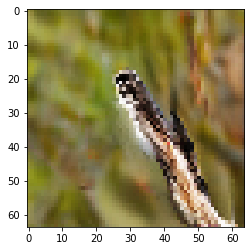

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 56

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.57296061515808 sec
Gen loss: 8.252050411410448, Gen valid loss: 1.3127564004443202, Gen attr loss: 3.419699082852702, Gen caption loss: 3.5195949381282983, Disc valid loss: 1.084700874519865, Disc valid real loss: 0.5568133318811898, Disc valid fake loss: 0.5278875416694941, Disc attr loss: 6.445983510999499, Disc attr real loss: 3.0262844281467967, Disc attr fake loss: 3.419699082852702
Time for epoch 2 is 37.43370842933655 sec
Gen loss: 8.26277323079303, Gen valid loss: 1.3120925087269728, Gen attr loss: 3.4293308936483493, Gen caption loss: 3.5213498326174935, Disc valid loss: 1.071901374231509, Disc valid real loss: 0.5470987364528624, Disc valid fake loss: 0.5248026339019217, Disc attr loss: 6.454796891871506, Disc attr real loss: 3.0254659982231575, Disc attr fake loss: 3.4293308936483493
Time for epoch 3 is 37.481807470321655 sec
Gen loss: 8

Time for epoch 21 is 37.57826375961304 sec
Gen loss: 8.253293941983685, Gen valid loss: 1.3088378408736976, Gen attr loss: 3.424790361709388, Gen caption loss: 3.519665721955338, Disc valid loss: 1.083731108887732, Disc valid real loss: 0.5522302981960742, Disc valid fake loss: 0.5315008072995235, Disc attr loss: 6.447985202639407, Disc attr real loss: 3.0231948409300187, Disc attr fake loss: 3.424790361709388
Time for epoch 22 is 37.60611128807068 sec
Gen loss: 8.259410999008633, Gen valid loss: 1.305333768772239, Gen attr loss: 3.430490564847703, Gen caption loss: 3.523586677018866, Disc valid loss: 1.0762531119310437, Disc valid real loss: 0.5512484289443267, Disc valid fake loss: 0.5250046828251868, Disc attr loss: 6.455423059825328, Disc attr real loss: 3.0249324949776253, Disc attr fake loss: 3.430490564847703
Time for epoch 23 is 37.53663611412048 sec
Gen loss: 8.311218922054218, Gen valid loss: 1.3218402384419428, Gen attr loss: 3.4513619708497996, Gen caption loss: 3.538016737

Time for epoch 41 is 37.48969221115112 sec
Gen loss: 8.252204391045298, Gen valid loss: 1.3030549442865016, Gen attr loss: 3.428610518695862, Gen caption loss: 3.5205389361394452, Disc valid loss: 1.0898913280750677, Disc valid real loss: 0.560305678182178, Disc valid fake loss: 0.529585650135185, Disc attr loss: 6.451323688837894, Disc attr real loss: 3.0227131701420316, Disc attr fake loss: 3.428610518695862
Time for epoch 42 is 37.535144090652466 sec
Gen loss: 8.295555561861695, Gen valid loss: 1.311597653036195, Gen attr loss: 3.4468606241996373, Gen caption loss: 3.537097300294292, Disc valid loss: 1.0723816652285052, Disc valid real loss: 0.5482534613551163, Disc valid fake loss: 0.5241282025811472, Disc attr loss: 6.468377738141109, Disc attr real loss: 3.0215171139414716, Disc attr fake loss: 3.4468606241996373
Time for epoch 43 is 37.53554129600525 sec
Gen loss: 8.327328821507896, Gen valid loss: 1.3074205703528592, Gen attr loss: 3.465971011133375, Gen caption loss: 3.5539372

Time for epoch 61 is 37.50578761100769 sec
Gen loss: 8.263314682616773, Gen valid loss: 1.3123576553856455, Gen attr loss: 3.428471843401591, Gen caption loss: 3.522485211289672, Disc valid loss: 1.0812803313014954, Disc valid real loss: 0.5517873171222242, Disc valid fake loss: 0.5294930144215664, Disc attr loss: 6.44909733388482, Disc attr real loss: 3.02062549048323, Disc attr fake loss: 3.428471843401591
Time for epoch 62 is 37.54392600059509 sec
Gen loss: 8.284121627083962, Gen valid loss: 1.3071100435605862, Gen attr loss: 3.4420303745967584, Gen caption loss: 3.5349812016577578, Disc valid loss: 1.079914315283137, Disc valid real loss: 0.5547172946497031, Disc valid fake loss: 0.5251970174835949, Disc attr loss: 6.462198071686556, Disc attr real loss: 3.0201676970897973, Disc attr fake loss: 3.4420303745967584
Time for epoch 63 is 37.52522850036621 sec
Gen loss: 8.30135001593489, Gen valid loss: 1.3119943779981555, Gen attr loss: 3.4477915078966923, Gen caption loss: 3.541564136

Time for epoch 81 is 37.474185943603516 sec
Gen loss: 8.283210919801459, Gen valid loss: 1.3126045244172984, Gen attr loss: 3.4357811157619405, Gen caption loss: 3.534825281075992, Disc valid loss: 1.0796008263500079, Disc valid real loss: 0.5508688654356856, Disc valid fake loss: 0.5287319597028458, Disc attr loss: 6.453088671857426, Disc attr real loss: 3.017307556095485, Disc attr fake loss: 3.4357811157619405
Time for epoch 82 is 37.50651216506958 sec
Gen loss: 8.2707588084668, Gen valid loss: 1.3159307874638213, Gen attr loss: 3.429646070087505, Gen caption loss: 3.525181998405353, Disc valid loss: 1.0727817385500362, Disc valid real loss: 0.5492275190062639, Disc valid fake loss: 0.5235542215628999, Disc attr loss: 6.44711061027961, Disc attr real loss: 3.017464540192105, Disc attr fake loss: 3.429646070087505
Time for epoch 83 is 37.65827512741089 sec
Gen loss: 8.301575279494289, Gen valid loss: 1.3208387699230577, Gen attr loss: 3.44157479190568, Gen caption loss: 3.53916171637

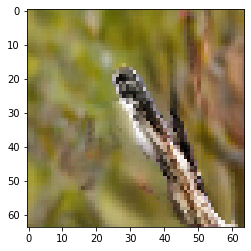

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 57

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.651123046875 sec
Gen loss: 8.27664456845622, Gen valid loss: 1.2993471783997244, Gen attr loss: 3.4420844300329523, Gen caption loss: 3.535212946455007, Disc valid loss: 1.0882191879316396, Disc valid real loss: 0.5520972410030158, Disc valid fake loss: 0.5361219488669863, Disc attr loss: 6.457434902023171, Disc attr real loss: 3.015350471990218, Disc attr fake loss: 3.4420844300329523
Time for epoch 2 is 37.79004955291748 sec
Gen loss: 8.282519632561742, Gen valid loss: 1.3229715872586258, Gen attr loss: 3.433521073685106, Gen caption loss: 3.52602697840228, Disc valid loss: 1.0668790981698488, Disc valid real loss: 0.5433508007507014, Disc valid fake loss: 0.5235282967730266, Disc attr loss: 6.4484335471621055, Disc attr real loss: 3.014912473476999, Disc attr fake loss: 3.433521073685106
Time for epoch 3 is 37.76148223876953 sec
Gen loss: 8.3037

Time for epoch 21 is 37.83663511276245 sec
Gen loss: 8.300813882977659, Gen valid loss: 1.3164873591606534, Gen attr loss: 3.4434446351638006, Gen caption loss: 3.54088191675946, Disc valid loss: 1.076277678574973, Disc valid real loss: 0.5503949459975328, Disc valid fake loss: 0.5258827324966752, Disc attr loss: 6.457283444520904, Disc attr real loss: 3.013838809357103, Disc attr fake loss: 3.4434446351638006
Time for epoch 22 is 37.81624937057495 sec
Gen loss: 8.272920386254949, Gen valid loss: 1.3093956571607408, Gen attr loss: 3.4334248585429616, Gen caption loss: 3.5300998707127764, Disc valid loss: 1.078639600496628, Disc valid real loss: 0.5508958702164937, Disc valid fake loss: 0.5277437312493156, Disc attr loss: 6.446834301883936, Disc attr real loss: 3.0134094433409735, Disc attr fake loss: 3.4334248585429616
Time for epoch 23 is 37.860687017440796 sec
Gen loss: 8.308545973242783, Gen valid loss: 1.3382932055933365, Gen attr loss: 3.4370454817929565, Gen caption loss: 3.53320

Time for epoch 41 is 37.93604302406311 sec
Gen loss: 8.253270900023338, Gen valid loss: 1.330527699898252, Gen attr loss: 3.414110245097297, Gen caption loss: 3.5086329765113065, Disc valid loss: 1.0727564503506917, Disc valid real loss: 0.5475736081923249, Disc valid fake loss: 0.5251828424814271, Disc attr loss: 6.426136662320393, Disc attr real loss: 3.0120264172230957, Disc attr fake loss: 3.414110245097297
Time for epoch 42 is 37.70820879936218 sec
Gen loss: 8.293929233137508, Gen valid loss: 1.3335569045407984, Gen attr loss: 3.4410990912739825, Gen caption loss: 3.5192732190698144, Disc valid loss: 1.0690898378367024, Disc valid real loss: 0.542109279047829, Disc valid fake loss: 0.5269805603234102, Disc attr loss: 6.452887603584021, Disc attr real loss: 3.0117885123100385, Disc attr fake loss: 3.4410990912739825
Time for epoch 43 is 37.94023299217224 sec
Gen loss: 8.245756931098173, Gen valid loss: 1.3183207001466415, Gen attr loss: 3.4160132382297257, Gen caption loss: 3.51142

Time for epoch 61 is 37.76689887046814 sec
Gen loss: 8.317601002328765, Gen valid loss: 1.3003495795939997, Gen attr loss: 3.463571952287421, Gen caption loss: 3.553679477877733, Disc valid loss: 1.0894043746033335, Disc valid real loss: 0.5521265509813459, Disc valid fake loss: 0.5372778249949943, Disc attr loss: 6.472156125678603, Disc attr real loss: 3.008584173391182, Disc attr fake loss: 3.463571952287421
Time for epoch 62 is 37.77949380874634 sec
Gen loss: 8.308527601443656, Gen valid loss: 1.3123552642540557, Gen attr loss: 3.451183052243902, Gen caption loss: 3.544989304813912, Disc valid loss: 1.0747378886876713, Disc valid real loss: 0.5490564184621743, Disc valid fake loss: 0.5256814725676849, Disc attr loss: 6.458773003038029, Disc attr real loss: 3.007589950794127, Disc attr fake loss: 3.451183052243902
Time for epoch 63 is 37.78809404373169 sec
Gen loss: 8.244520827037531, Gen valid loss: 1.3038396846634264, Gen attr loss: 3.4251424381080358, Gen caption loss: 3.515538717

Time for epoch 81 is 37.677149295806885 sec
Gen loss: 8.24568699885836, Gen valid loss: 1.3090779052840338, Gen attr loss: 3.4214646292895807, Gen caption loss: 3.5151444702613643, Disc valid loss: 1.0842830572671038, Disc valid real loss: 0.5546933665346647, Disc valid fake loss: 0.5295896927515665, Disc attr loss: 6.42982111261466, Disc attr real loss: 3.0083564833250795, Disc attr fake loss: 3.4214646292895807
Time for epoch 82 is 37.666789531707764 sec
Gen loss: 8.224981473390326, Gen valid loss: 1.2991638307972007, Gen attr loss: 3.4194236564119334, Gen caption loss: 3.506393996680655, Disc valid loss: 1.082389225158588, Disc valid real loss: 0.5522258153291253, Disc valid fake loss: 0.5301634089410466, Disc attr loss: 6.425682671347931, Disc attr real loss: 3.0062590149359973, Disc attr fake loss: 3.4194236564119334
Time for epoch 83 is 37.72514510154724 sec
Gen loss: 8.283140625733994, Gen valid loss: 1.2927256892044046, Gen attr loss: 3.454620661128181, Gen caption loss: 3.5357

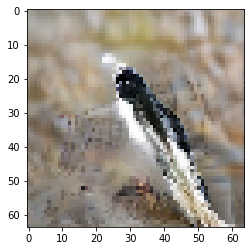

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 58

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.65258002281189 sec
Gen loss: 8.31215448172758, Gen valid loss: 1.3046482693212142, Gen attr loss: 3.4623349455960075, Gen caption loss: 3.545171278925123, Disc valid loss: 1.0845339151255806, Disc valid real loss: 0.5524625323490722, Disc valid fake loss: 0.53207137994973, Disc attr loss: 6.4676978885319825, Disc attr real loss: 3.0053629429359745, Disc attr fake loss: 3.4623349455960075
Time for epoch 2 is 37.69052982330322 sec
Gen loss: 8.279261092829511, Gen valid loss: 1.3165318841533609, Gen attr loss: 3.436330341065156, Gen caption loss: 3.526398871972309, Disc valid loss: 1.0728875996297613, Disc valid real loss: 0.5474870156466476, Disc valid fake loss: 0.5254005862445366, Disc attr loss: 6.442711761650354, Disc attr real loss: 3.006381420585198, Disc attr fake loss: 3.436330341065156
Time for epoch 3 is 37.73155403137207 sec
Gen loss: 8.32

Time for epoch 21 is 37.79983186721802 sec
Gen loss: 8.32667519794247, Gen valid loss: 1.2956953933891566, Gen attr loss: 3.4710738917353354, Gen caption loss: 3.5599059380166898, Disc valid loss: 1.0908891558647156, Disc valid real loss: 0.5593838144124039, Disc valid fake loss: 0.5315053382217076, Disc attr loss: 6.472395666246491, Disc attr real loss: 3.0013217745111564, Disc attr fake loss: 3.4710738917353354
Time for epoch 22 is 37.717302322387695 sec
Gen loss: 8.230391592837284, Gen valid loss: 1.3015488402307196, Gen attr loss: 3.418013672841597, Gen caption loss: 3.5108290784727267, Disc valid loss: 1.0782818938012368, Disc valid real loss: 0.5513213687957463, Disc valid fake loss: 0.5269605240363092, Disc attr loss: 6.422386296719393, Disc attr real loss: 3.0043726238777966, Disc attr fake loss: 3.418013672841597
Time for epoch 23 is 37.78384971618652 sec
Gen loss: 8.258758530707217, Gen valid loss: 1.3083591916696813, Gen attr loss: 3.4289093838151556, Gen caption loss: 3.521

Time for epoch 41 is 38.075295209884644 sec
Gen loss: 8.277604338276355, Gen valid loss: 1.3030591172577566, Gen attr loss: 3.4437643195878525, Gen caption loss: 3.530780891738933, Disc valid loss: 1.0822339288910554, Disc valid real loss: 0.5550871197447221, Disc valid fake loss: 0.527146808257917, Disc attr loss: 6.443912887960915, Disc attr real loss: 3.000148568373062, Disc attr fake loss: 3.4437643195878525
Time for epoch 42 is 38.035842180252075 sec
Gen loss: 8.284550549215094, Gen valid loss: 1.3151236998679514, Gen attr loss: 3.441079874994955, Gen caption loss: 3.5283469636911944, Disc valid loss: 1.070995615426764, Disc valid real loss: 0.5451151129353015, Disc valid fake loss: 0.5258805041067646, Disc attr loss: 6.442753543698691, Disc attr real loss: 3.0016736687037358, Disc attr fake loss: 3.441079874994955
Time for epoch 43 is 37.9515962600708 sec
Gen loss: 8.294691367524104, Gen valid loss: 1.3440361089176602, Gen attr loss: 3.433027921330315, Gen caption loss: 3.5176273

Time for epoch 61 is 38.07098317146301 sec
Gen loss: 8.264934928759649, Gen valid loss: 1.3198812350348081, Gen attr loss: 3.4272076424544418, Gen caption loss: 3.5178460241333256, Disc valid loss: 1.0778496806537556, Disc valid real loss: 0.5468456172523136, Disc valid fake loss: 0.5310040633206768, Disc attr loss: 6.426706913687026, Disc attr real loss: 2.999499271232584, Disc attr fake loss: 3.4272076424544418
Time for epoch 62 is 38.08545184135437 sec
Gen loss: 8.24578621458555, Gen valid loss: 1.3196452053258736, Gen attr loss: 3.4162442826320163, Gen caption loss: 3.5098967435883313, Disc valid loss: 1.071241325640743, Disc valid real loss: 0.5463199827890732, Disc valid fake loss: 0.5249213378442336, Disc attr loss: 6.413487772631451, Disc attr real loss: 2.9972434899994354, Disc attr fake loss: 3.4162442826320163
Time for epoch 63 is 38.05688238143921 sec
Gen loss: 8.283437137035174, Gen valid loss: 1.307853946033209, Gen attr loss: 3.440975682199163, Gen caption loss: 3.534607

Time for epoch 81 is 38.07323932647705 sec
Gen loss: 8.241977130817528, Gen valid loss: 1.3129762737408563, Gen attr loss: 3.4150308057221617, Gen caption loss: 3.513970037785972, Disc valid loss: 1.0775642645391346, Disc valid real loss: 0.5511055734099412, Disc valid fake loss: 0.5264586906446028, Disc attr loss: 6.409937704158669, Disc attr real loss: 2.9949068984365077, Disc attr fake loss: 3.4150308057221617
Time for epoch 82 is 38.04516339302063 sec
Gen loss: 8.301356743344769, Gen valid loss: 1.3168074722858625, Gen attr loss: 3.453405627067173, Gen caption loss: 3.5311436485145795, Disc valid loss: 1.0756962123279004, Disc valid real loss: 0.5472121351779637, Disc valid fake loss: 0.5284840763422854, Disc attr loss: 6.4475085089200235, Disc attr real loss: 2.9941028818528506, Disc attr fake loss: 3.453405627067173
Time for epoch 83 is 37.9001145362854 sec
Gen loss: 8.250852502135404, Gen valid loss: 1.3175877520062413, Gen attr loss: 3.423269090290638, Gen caption loss: 3.50999

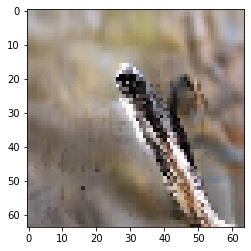

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 59

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.009735345840454 sec
Gen loss: 8.264831517123918, Gen valid loss: 1.3220795037623667, Gen attr loss: 3.4289226318762553, Gen caption loss: 3.5138293785777517, Disc valid loss: 1.0767351669993828, Disc valid real loss: 0.5526314111259895, Disc valid fake loss: 0.5241037561156885, Disc attr loss: 6.420796791712443, Disc attr real loss: 2.9918741598361875, Disc attr fake loss: 3.4289226318762553
Time for epoch 2 is 38.015657901763916 sec
Gen loss: 8.25737728982114, Gen valid loss: 1.3090836680355433, Gen attr loss: 3.4302514995016704, Gen caption loss: 3.5180421314911468, Disc valid loss: 1.0788524213845168, Disc valid real loss: 0.5486328497650178, Disc valid fake loss: 0.5302195710541433, Disc attr loss: 6.422340166924123, Disc attr real loss: 2.9920886674224523, Disc attr fake loss: 3.4302514995016704
Time for epoch 3 is 37.99552249908447 sec
Gen lo

Time for epoch 21 is 38.07083201408386 sec
Gen loss: 8.229575221777608, Gen valid loss: 1.3106535879900139, Gen attr loss: 3.4106184266770114, Gen caption loss: 3.5083031983879525, Disc valid loss: 1.0864136303020364, Disc valid real loss: 0.5549756125382937, Disc valid fake loss: 0.5314380174406822, Disc attr loss: 6.399087312421824, Disc attr real loss: 2.988468885744813, Disc attr fake loss: 3.4106184266770114
Time for epoch 22 is 38.12654709815979 sec
Gen loss: 8.217159524519593, Gen valid loss: 1.3069990543815178, Gen attr loss: 3.40805601750609, Gen caption loss: 3.5021044587701318, Disc valid loss: 1.0797547761017714, Disc valid real loss: 0.5512631987007006, Disc valid fake loss: 0.5284915778856614, Disc attr loss: 6.396467311595513, Disc attr real loss: 2.988411294089423, Disc attr fake loss: 3.40805601750609
Time for epoch 23 is 38.12575697898865 sec
Gen loss: 8.295958136478413, Gen valid loss: 1.3114882562218644, Gen attr loss: 3.449397490922675, Gen caption loss: 3.53507241

Time for epoch 41 is 38.0862340927124 sec
Gen loss: 8.285917457849353, Gen valid loss: 1.3255189317997877, Gen attr loss: 3.437632541992477, Gen caption loss: 3.522765984703209, Disc valid loss: 1.0742283175954328, Disc valid real loss: 0.5510660677259853, Disc valid fake loss: 0.5231622514039843, Disc attr loss: 6.425928335525803, Disc attr real loss: 2.988295793533325, Disc attr fake loss: 3.437632541992477
Time for epoch 42 is 38.30569529533386 sec
Gen loss: 8.22682074156557, Gen valid loss: 1.3147840671099944, Gen attr loss: 3.4092761436452066, Gen caption loss: 3.502760525318342, Disc valid loss: 1.0745841676626748, Disc valid real loss: 0.5475025207692692, Disc valid fake loss: 0.5270816468934056, Disc attr loss: 6.395014890487278, Disc attr real loss: 2.9857387468420717, Disc attr fake loss: 3.4092761436452066
Time for epoch 43 is 38.01617670059204 sec
Gen loss: 8.283836647747009, Gen valid loss: 1.321070322660896, Gen attr loss: 3.437159237176745, Gen caption loss: 3.5256070741

Time for epoch 61 is 38.1421914100647 sec
Gen loss: 8.215242349681493, Gen valid loss: 1.2959858056329454, Gen attr loss: 3.412251504779185, Gen caption loss: 3.5070050318389727, Disc valid loss: 1.0849180156945537, Disc valid real loss: 0.5564696850169318, Disc valid fake loss: 0.5284483321313935, Disc attr loss: 6.395905054358609, Disc attr real loss: 2.983653549579424, Disc attr fake loss: 3.412251504779185
Time for epoch 62 is 38.170761823654175 sec
Gen loss: 8.213909394695829, Gen valid loss: 1.3050812941579637, Gen attr loss: 3.4079058260775517, Gen caption loss: 3.500922274137254, Disc valid loss: 1.079280264009305, Disc valid real loss: 0.5465710863349883, Disc valid fake loss: 0.5327091779973772, Disc attr loss: 6.3920619106551175, Disc attr real loss: 2.9841560845775654, Disc attr fake loss: 3.4079058260775517
Time for epoch 63 is 38.22993469238281 sec
Gen loss: 8.251474425721621, Gen valid loss: 1.3084820303813551, Gen attr loss: 3.426982966864981, Gen caption loss: 3.516009

Time for epoch 81 is 37.9537513256073 sec
Gen loss: 8.220669715385126, Gen valid loss: 1.309433386254763, Gen attr loss: 3.4076200823796796, Gen caption loss: 3.5036162464276237, Disc valid loss: 1.0783212420740103, Disc valid real loss: 0.5500635051630377, Disc valid fake loss: 0.5282577363456168, Disc attr loss: 6.389449895558965, Disc attr real loss: 2.981829813179285, Disc attr fake loss: 3.4076200823796796
Time for epoch 82 is 37.82735323905945 sec
Gen loss: 8.214062733378837, Gen valid loss: 1.2999631783503505, Gen attr loss: 3.4127163935482985, Gen caption loss: 3.50138315534204, Disc valid loss: 1.087072596155854, Disc valid real loss: 0.5522020048888395, Disc valid fake loss: 0.5348705916708401, Disc attr loss: 6.394198043236565, Disc attr real loss: 2.981481649688266, Disc attr fake loss: 3.4127163935482985
Time for epoch 83 is 37.56720852851868 sec
Gen loss: 8.228823995202537, Gen valid loss: 1.3131424240303557, Gen attr loss: 3.416267190845355, Gen caption loss: 3.499414378

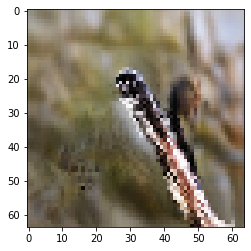

In [182]:
next_starting_checkpoint, totalepochs, warmup = long_train(starting_checkpoint=next_starting_checkpoint, 
                                      num_checkpoints=20, 
                                      checkpoint_interval=100, 
                                      g_hist=gen_loss_hist, 
                                      g_valid_hist=gen_valid_loss_hist,
                                      g_attr_hist=gen_attr_loss_hist,
                                      g_caption_hist=gen_caption_loss_hist,
                                      d_hist=disc_loss_hist,
                                      d_real_hist=disc_loss_real_hist,
                                      d_fake_hist=disc_loss_fake_hist,
                                      d_attr_real_hist=disc_attr_loss_real_hist,
                                      d_attr_fake_hist=disc_attr_loss_fake_hist,
                                      noise=noise300,
                                      caption=caption,
                                      save_files=True,
                                      warmup=warmup)

In [27]:
generator.load_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss/gen_weights_attributes_split_6000.h5')
discriminator_valid.load_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss/disc_weights_attributes_split_valid_6000.h5')
discriminator_attr.load_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss/disc_weights_attributes_split_attr_6000.h5')

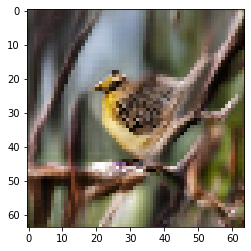

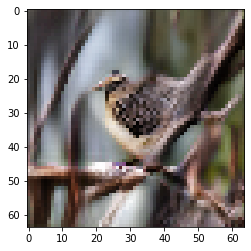

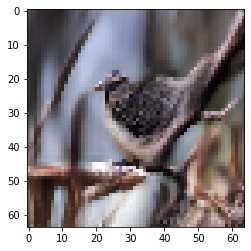

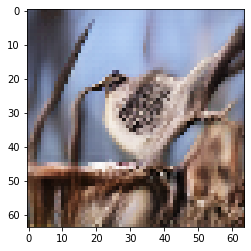

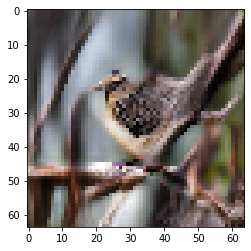

In [200]:
captions = train_captions[np.random.choice(range(len(train_captions)), 5, replace=False)]
# attrs = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
# tempnoise = np.random.normal(0, 1, 300)
for i in range(5):
#     tempnoise = np.random.normal(0, 1, 300)

    
#     attrs[2] += 1.
    
    generated_image = generator.predict([np.array([tempnoise]), np.array([1.*captions[i]])] )[0][0]
    plt.imshow(unnormalize_img(generated_image))
    plt.show()
#     ax.imshow(unnormalize_img(generated_image))

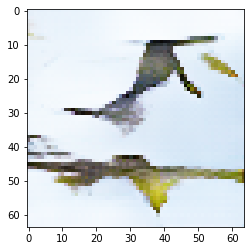

In [306]:
caption = bc.encode(['the medium sized bird has a dark grey color, a black downward curved beak, and long wings.'])[0]
noise = np.random.normal(0, 1, 300)
for i in range(1):
    generated_image = generator.predict([np.array([noise]), np.array([1.*caption])] )[0][0]
    plt.imshow(unnormalize_img(generated_image))
    plt.show()
#     ax.imshow(unnormalize_img(generated_image))

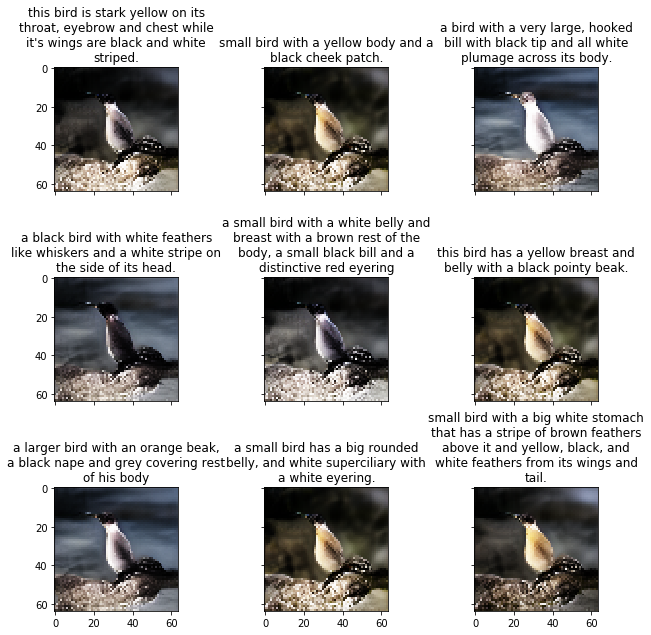

In [61]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=1.2,  # pad between axes in inch.
                 )

indices = np.random.choice(len(train_captions), 9)
captions = train_captions[indices]
text = [caption_text[x] for x in indices]
tempnoise = np.random.normal(0, 1, 300)
for i, ax in enumerate(grid):
    generated_image = generator.predict([np.array([tempnoise]), np.array([captions[i]])] )[0][0]
    ax.imshow(unnormalize_img(generated_image))
    ax.set_title('\n'.join(wrap(text[i], 35)))

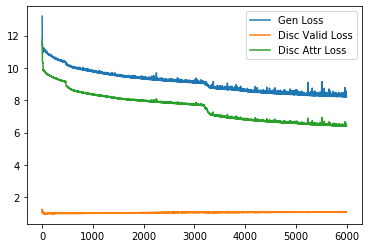

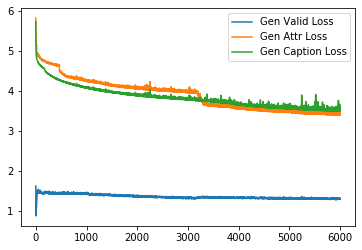

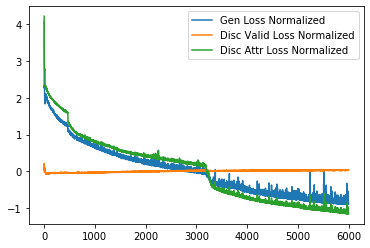

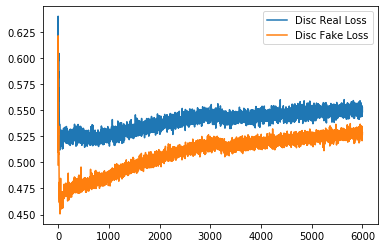

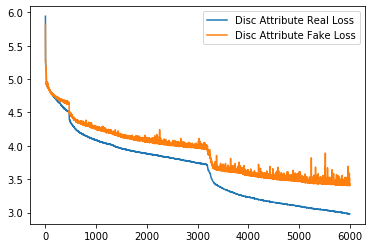

In [183]:
plot_save_dir = 'bird-gan-attributes-split-captions-concat-caption-loss'

from operator import add
disc_attr_loss_hist = list( map(add, disc_attr_loss_real_hist, disc_attr_loss_fake_hist) )

plt.plot(gen_loss_hist)
plt.plot(disc_loss_hist)
plt.plot(disc_attr_loss_hist)

plt.legend(['Gen Loss','Disc Valid Loss', 'Disc Attr Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_d_losses.png')
plt.show()

plt.plot(gen_valid_loss_hist)
plt.plot(gen_attr_loss_hist)
plt.plot(gen_caption_loss_hist)
plt.legend(['Gen Valid Loss', 'Gen Attr Loss', 'Gen Caption Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_valid_attr_losses.png')
plt.show()

plt.plot(gen_loss_hist - np.mean(gen_loss_hist))
plt.plot(disc_loss_hist - np.mean(disc_loss_hist))
plt.plot(disc_attr_loss_hist - np.mean(disc_attr_loss_hist))
plt.legend(['Gen Loss Normalized','Disc Valid Loss Normalized', 'Disc Attr Loss Normalized'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_d_losses_normalized.png')
plt.show()

plt.plot(disc_loss_real_hist)
plt.plot(disc_loss_fake_hist)
plt.legend(['Disc Real Loss','Disc Fake Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/d_real_fake_losses.png')
plt.show()

plt.plot(disc_attr_loss_real_hist)
# plt.show()
plt.plot(disc_attr_loss_fake_hist)
plt.legend(['Disc Attribute Real Loss', 'Disc Attribute Fake Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/d_attribute_real_fake_losses.png')
plt.show()


In [ ]:
prediction = discriminator_attr.predict(np.array([train_imgs[6]]))[0]
print(np.where(np.round(prediction) == 1))

In [ ]:
prediction = discriminator_attr.predict(np.array([train_imgs[344]]))[0]
print(np.where(np.round(prediction) == 1))

In [ ]:
d = dict.fromkeys([i for i in range(10)], 0)
prediction = discriminator_attr.predict(np.array(train_imgs))
prediction = np.round(prediction)
for p in prediction:
    p = np.where(p == 1)
    for i in p[0]:
        d[i] += 1
    
# for im in train_imgs:
#     for p in prediction[0]:
#         d[p] += 1

In [ ]:
plt.bar([x for x in range(10)], d.values())

In [ ]:
plt.bar([x for x in range(10)], np.sum(train_attrs, axis=0))

In [ ]:
train_captions[0]

In [206]:
from bert_serving.client import BertClient
bc = BertClient()

In [207]:
testcaption = bc.encode(['red bird.'])[0]

In [210]:
testcaption[0][0]


-0.05975466